In [1]:
# import all libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
oral_cancer_df = pd.read_csv('oral_cancer_prediction_dataset.csv', )

oral_cancer_df.head()

,ID,Country,Age,Gender,Tobacco Use,Alcohol Consumption,HPV Infection,Betel Quid Use,Chronic Sun Exposure,Poor Oral Hygiene,...,Difficulty Swallowing,White or Red Patches in Mouth,Tumor Size (cm),Cancer Stage,Treatment Type,"Survival Rate (5-Year, %)",Cost of Treatment (USD),Economic Burden (Lost Workdays per Year),Early Diagnosis,Oral Cancer (Diagnosis)
0,1,Italy,36,Female,Yes,Yes,Yes,No,No,Yes,...,No,No,0.000000,0,No Treatment,100.000000,0.00,0,No,No
1,2,Japan,64,Male,Yes,Yes,Yes,No,Yes,Yes,...,No,No,1.782186,1,No Treatment,83.340103,77772.50,177,No,Yes
2,3,UK,37,Female,No,Yes,No,No,Yes,Yes,...,No,Yes,3.523895,2,Surgery,63.222871,101164.50,130,Yes,Yes
3,4,Sri Lanka,55,Male,Yes,Yes,No,Yes,No,Yes,...,No,No,0.000000,0,No Treatment,100.000000,0.00,0,Yes,No
4,5,South Africa,68,Male,No,No,No,No,No,Yes,...,No,No,2.834789,3,No Treatment,44.293199,45354.75,52,No,Yes


### DATA CLEANING

In [3]:
oral_cancer_df.shape

(84922, 25)

In [4]:
oral_cancer_df.describe()

,ID,Age,Tumor Size (cm),Cancer Stage,"Survival Rate (5-Year, %)",Cost of Treatment (USD),Economic Burden (Lost Workdays per Year)
count,84922.000000,84922.000000,84922.000000,84922.000000,84922.000000,84922.000000,84922.000000
mean,42461.500000,54.509444,1.747294,1.118756,79.503364,39109.881244,52.028391
std,24515.014117,10.014839,2.028199,1.340418,26.483746,44710.687054,60.389796
min,1.000000,15.000000,0.000000,0.000000,10.000750,0.000000,0.000000
25%,21231.250000,48.000000,0.000000,0.000000,65.233425,0.000000,0.000000
50%,42461.500000,55.000000,0.000000,0.000000,100.000000,0.000000,0.000000
75%,63691.750000,61.000000,3.480075,2.000000,100.000000,76468.437500,104.000000
max,84922.000000,101.000000,5.999899,4.000000,100.000000,159988.000000,179.000000


In [5]:
oral_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84922 entries, 0 to 84921
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   ID                                        84922 non-null  int64  
 1   Country                                   84922 non-null  object 
 2   Age                                       84922 non-null  int64  
 3   Gender                                    84922 non-null  object 
 4   Tobacco Use                               84922 non-null  object 
 5   Alcohol Consumption                       84922 non-null  object 
 6   HPV Infection                             84922 non-null  object 
 7   Betel Quid Use                            84922 non-null  object 
 8   Chronic Sun Exposure                      84922 non-null  object 
 9   Poor Oral Hygiene                         84922 non-null  object 
 10  Diet (Fruits & Vegetables Intake) 

In [6]:
oral_cancer_df.columns

Index(['ID', 'Country', 'Age', 'Gender', 'Tobacco Use', 'Alcohol Consumption',
       'HPV Infection', 'Betel Quid Use', 'Chronic Sun Exposure',
       'Poor Oral Hygiene', 'Diet (Fruits & Vegetables Intake)',
       'Family History of Cancer', 'Compromised Immune System', 'Oral Lesions',
       'Unexplained Bleeding', 'Difficulty Swallowing',
       'White or Red Patches in Mouth', 'Tumor Size (cm)', 'Cancer Stage',
       'Treatment Type', 'Survival Rate (5-Year, %)',
       'Cost of Treatment (USD)', 'Economic Burden (Lost Workdays per Year)',
       'Early Diagnosis', 'Oral Cancer (Diagnosis)'],
      dtype='object')

#### Check for missing values

In [7]:
oral_cancer_df.isnull().any()

ID                                          False
Country                                     False
Age                                         False
Gender                                      False
Tobacco Use                                 False
Alcohol Consumption                         False
HPV Infection                               False
Betel Quid Use                              False
Chronic Sun Exposure                        False
Poor Oral Hygiene                           False
Diet (Fruits & Vegetables Intake)           False
Family History of Cancer                    False
Compromised Immune System                   False
Oral Lesions                                False
Unexplained Bleeding                        False
Difficulty Swallowing                       False
White or Red Patches in Mouth               False
Tumor Size (cm)                             False
Cancer Stage                                False
Treatment Type                              False


In [8]:
oral_cancer_df.isnull().sum()

ID                                          0
Country                                     0
Age                                         0
Gender                                      0
Tobacco Use                                 0
Alcohol Consumption                         0
HPV Infection                               0
Betel Quid Use                              0
Chronic Sun Exposure                        0
Poor Oral Hygiene                           0
Diet (Fruits & Vegetables Intake)           0
Family History of Cancer                    0
Compromised Immune System                   0
Oral Lesions                                0
Unexplained Bleeding                        0
Difficulty Swallowing                       0
White or Red Patches in Mouth               0
Tumor Size (cm)                             0
Cancer Stage                                0
Treatment Type                              0
Survival Rate (5-Year, %)                   0
Cost of Treatment (USD)           

<Axes: >

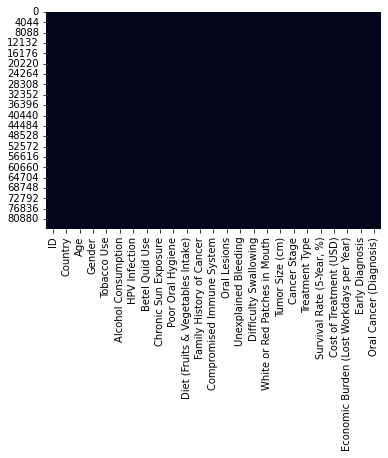

In [9]:
# use heatmap
sns.heatmap(oral_cancer_df.isnull(), cbar=False)

### Check for duplicates

In [10]:
oral_cancer_df.duplicated().sum()

0

#### Check for data types

In [11]:
oral_cancer_df.dtypes

ID                                            int64
Country                                      object
Age                                           int64
Gender                                       object
Tobacco Use                                  object
Alcohol Consumption                          object
HPV Infection                                object
Betel Quid Use                               object
Chronic Sun Exposure                         object
Poor Oral Hygiene                            object
Diet (Fruits & Vegetables Intake)            object
Family History of Cancer                     object
Compromised Immune System                    object
Oral Lesions                                 object
Unexplained Bleeding                         object
Difficulty Swallowing                        object
White or Red Patches in Mouth                object
Tumor Size (cm)                             float64
Cancer Stage                                  int64
Treatment Ty

### Standardize column names

### Column names to lower case

In [12]:
oral_cancer_df.columns = oral_cancer_df.columns.str.strip().str.lower().str.replace(" ", "_")

oral_cancer_df.columns

Index(['id', 'country', 'age', 'gender', 'tobacco_use', 'alcohol_consumption',
       'hpv_infection', 'betel_quid_use', 'chronic_sun_exposure',
       'poor_oral_hygiene', 'diet_(fruits_&_vegetables_intake)',
       'family_history_of_cancer', 'compromised_immune_system', 'oral_lesions',
       'unexplained_bleeding', 'difficulty_swallowing',
       'white_or_red_patches_in_mouth', 'tumor_size_(cm)', 'cancer_stage',
       'treatment_type', 'survival_rate_(5-year,_%)',
       'cost_of_treatment_(usd)', 'economic_burden_(lost_workdays_per_year)',
       'early_diagnosis', 'oral_cancer_(diagnosis)'],
      dtype='object')

In [13]:
oral_cancer_df['gender'].unique

<bound method Series.unique of 0        Female
1          Male
2        Female
3          Male
4          Male
          ...  
84917      Male
84918      Male
84919      Male
84920      Male
84921      Male
Name: gender, Length: 84922, dtype: object>

### Convert float numbers correct to 2dp

In [14]:
oral_cancer_df.head(2)

,id,country,age,gender,tobacco_use,alcohol_consumption,hpv_infection,betel_quid_use,chronic_sun_exposure,poor_oral_hygiene,...,difficulty_swallowing,white_or_red_patches_in_mouth,tumor_size_(cm),cancer_stage,treatment_type,"survival_rate_(5-year,_%)",cost_of_treatment_(usd),economic_burden_(lost_workdays_per_year),early_diagnosis,oral_cancer_(diagnosis)
0,1,Italy,36,Female,Yes,Yes,Yes,No,No,Yes,...,No,No,0.000000,0,No Treatment,100.000000,0.0,0,No,No
1,2,Japan,64,Male,Yes,Yes,Yes,No,Yes,Yes,...,No,No,1.782186,1,No Treatment,83.340103,77772.5,177,No,Yes


In [15]:
round_col = [
    'tumor_size_(cm)',
    'survival_rate_(5-year,_%)'
    ]

oral_cancer_df[round_col] = oral_cancer_df[round_col].round(2)

oral_cancer_df.head(2)

,id,country,age,gender,tobacco_use,alcohol_consumption,hpv_infection,betel_quid_use,chronic_sun_exposure,poor_oral_hygiene,...,difficulty_swallowing,white_or_red_patches_in_mouth,tumor_size_(cm),cancer_stage,treatment_type,"survival_rate_(5-year,_%)",cost_of_treatment_(usd),economic_burden_(lost_workdays_per_year),early_diagnosis,oral_cancer_(diagnosis)
0,1,Italy,36,Female,Yes,Yes,Yes,No,No,Yes,...,No,No,0.00,0,No Treatment,100.00,0.0,0,No,No
1,2,Japan,64,Male,Yes,Yes,Yes,No,Yes,Yes,...,No,No,1.78,1,No Treatment,83.34,77772.5,177,No,Yes


#### Handle outliers

In [16]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]




In [17]:
Q1 = oral_cancer_df['age'].quantile(0.25)
Q3 = oral_cancer_df['age'].quantile(0.75)

IQR = Q3 - Q1


print("Q1", Q1)
print("Q3", Q3)
print("IQR", IQR)


Q1 48.0
Q3 61.0
IQR 13.0


In [62]:
print(oral_cancer_df['age'].min())
print(oral_cancer_df['age'].max())
print(oral_cancer_df['age'].mean())

15
101
54.50944396034008


In [19]:
# Example usage
outliers = detect_outliers_iqr(oral_cancer_df, 'age')
print(outliers)

          id    country  age  gender tobacco_use alcohol_consumption  \
201      202      India   28    Male         Yes                  No   
408      409  Sri Lanka   28    Male         Yes                 Yes   
470      471      Kenya   26  Female         Yes                  No   
566      567     Russia   28    Male         Yes                  No   
776      777     Taiwan   82    Male          No                 Yes   
...      ...        ...  ...     ...         ...                 ...   
84287  84288  Sri Lanka   83    Male         Yes                 Yes   
84433  84434        USA   88  Female         Yes                  No   
84480  84481      Japan   28    Male          No                  No   
84599  84600    Germany   23    Male         Yes                 Yes   
84711  84712   Pakistan   28    Male          No                 Yes   

      hpv_infection betel_quid_use chronic_sun_exposure poor_oral_hygiene  \
201              No            Yes                   No   

In [20]:
print(oral_cancer_df['tumor_size_(cm)'].min())
print(oral_cancer_df['tumor_size_(cm)'].max())

0.0
6.0


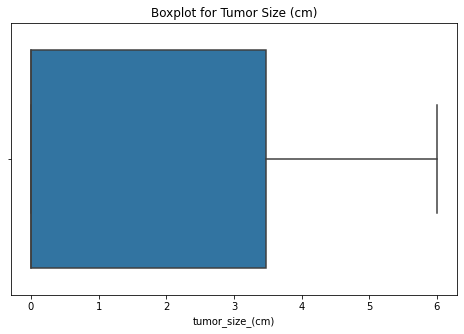

In [21]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=oral_cancer_df["tumor_size_(cm)"])
plt.title("Boxplot for Tumor Size (cm)")
plt.show()



In [22]:
print(oral_cancer_df['age'].min())
print(oral_cancer_df['age'].max())

15
101


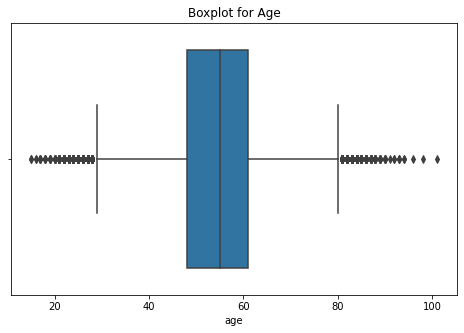

In [23]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=oral_cancer_df["age"])
plt.title("Boxplot for Age")
plt.show()

In [24]:
print(oral_cancer_df['cost_of_treatment_(usd)'].min())
print(oral_cancer_df['cost_of_treatment_(usd)'].max())

0.0
159988.0


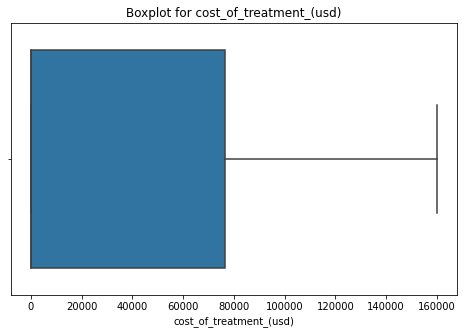

In [25]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=oral_cancer_df["cost_of_treatment_(usd)"])
plt.title("Boxplot for cost_of_treatment_(usd)")
plt.show()

### Research Question

## 1. How Do Early Diagnosis and Treatment Type Impact Survival Rates and Economic Burden Among Oral Cancer Patients?

This research question aims to analyze how diagnosing oral cancer at an early stage, along with the chosen treatment approach, influences survival rates and economic costs for patients.

I should consider, early_diagnosis, survival_rate, economic burden, cost of treatment as major fields

In [26]:
# rename columns

oral_cancer_df = oral_cancer_df.rename(columns={
    'tumor_size_(cm)': 'tumor_size',
    'survival_rate_(5-year,_%)': 'survival_rate',
    'cost_of_treatment_(usd)': 'cost_of_treatment',
    'economic_burden_(lost_workdays_per_year)':'economic_burden',
    'oral_cancer_(diagnosis)': 'diagnosis'
})

# oral_cancer_df.head(2)

#### Summary Statistics

In [27]:
print("Summary Statistics:")
oral_cancer_statistics = oral_cancer_df[['survival_rate', 'cost_of_treatment', 'economic_burden']].describe()
print(oral_cancer_statistics)

Summary Statistics:
       survival_rate  cost_of_treatment  economic_burden
count   84922.000000       84922.000000     84922.000000
mean       79.503359       39109.881244        52.028391
std        26.483742       44710.687054        60.389796
min        10.000000           0.000000         0.000000
25%        65.230000           0.000000         0.000000
50%       100.000000           0.000000         0.000000
75%       100.000000       76468.437500       104.000000
max       100.000000      159988.000000       179.000000


### From the above statisitcs:

The mean survival rate is 79.5%, this indicates that most patients have a high chance of survival.

On average, patients lose 52 workdays per year due to oral cancer.

Some patients (25%) lose no workdays and incurred zero treatment costs, , possibly due to early diagnosis

- There is a Link Between Cancer Stage and Economic Impact such that:

Patients with higher treatment costs also have more lost workdays.

Those who are diagnosed early tend to have lower costs and minimal economic burden.

### Group by Analysis

In [28]:
print("\nAverage Survival Rate by Diagnosis Stage:")
survival_rate = oral_cancer_df.groupby("cancer_stage")["survival_rate"].mean()

print(survival_rate)



Average Survival Rate by Diagnosis Stage:
cancer_stage
0    100.000000
1     84.984447
2     67.469977
3     39.957052
4     20.081187
Name: survival_rate, dtype: float64


In [29]:
print("\nTumor Size & Cost of Treatment by Treatment Type:")

oral_cancer_df.groupby('treatment_type')[['tumor_size','cost_of_treatment']].mean()


Tumor Size & Cost of Treatment by Treatment Type:


,tumor_size,cost_of_treatment
treatment_type,,
Chemotherapy,3.516545,78136.382225
No Treatment,0.577721,12979.836404
Radiation,3.487600,78589.447723
Surgery,3.510754,78365.255735
Targeted Therapy,3.513186,78616.147549


1. No Treatment is associated with significantly smaller tumors (0.58 cm) and lower costs (~$12,980).
This suggests that patients opting for no treatment likely have early-stage cancer.

Chemotherapy, Radiation, Surgery, and Targeted Therapy have similar tumor sizes (~3.5 cm).
This implies that these treatments are used at similar stages of cancer progression (likely moderate to advanced stages).

Radiation has the highest treatment cost (~78,616).
Radiation and Targeted Therapy tend to be more expensive, possibly due to longer treatment durations and advanced medical equipment required.

Chemotherapy and Surgery are slightly less costly but still expensive (~78,400).

In [30]:
print("\nFrequency of Cancer Stages:")
level_frequency = oral_cancer_df["cancer_stage"].value_counts()

print(level_frequency)



Frequency of Cancer Stages:
cancer_stage
0    42573
2    12865
1    12713
3    10520
4     6251
Name: count, dtype: int64


A significant number of cases (Stage 0) are detected early, which aligns with the high median survival rate (100%) observed in the summary statistics.

 Correletaion analysis

In [31]:
corr_df = oral_cancer_df[['survival_rate', 'cost_of_treatment', 'economic_burden', 'tumor_size']]
corr_matrix = corr_df.corr()
print("\nCorrelation Matrix:")
print(corr_matrix)


Correlation Matrix:
                   survival_rate  cost_of_treatment  economic_burden  \
survival_rate           1.000000          -0.806619        -0.671807   
cost_of_treatment      -0.806619           1.000000         0.759583   
economic_burden        -0.671807           0.759583         1.000000   
tumor_size             -0.669145           0.757527         0.746402   

                   tumor_size  
survival_rate       -0.669145  
cost_of_treatment    0.757527  
economic_burden      0.746402  
tumor_size           1.000000  


There is a Strong Negative Correlation Between Survival Rate & Cost of Treatment (-0.81)
As treatment costs increase, survival rates tend to decrease.

This suggests that late-stage cancer cases (which require expensive treatments like chemotherapy and surgery) have lower survival rates.

Strong Positive Correlation Between Cost of Treatment & Economic Burden (0.76)
Higher treatment costs contribute directly to a higher economic burden.

Tumor Size is Positively Correlated with Treatment Cost (0.76) and Economic Burden (0.75)
as Larger tumors are associated with more expensive treatments

### Data Visualization

Survival rate distribution

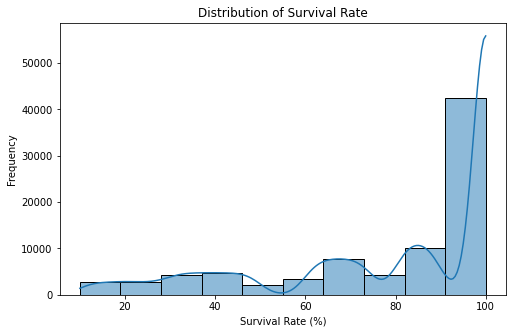

In [32]:
plt.figure(figsize=(8, 5))
sns.histplot(oral_cancer_df['survival_rate'], bins=10, kde=True)
plt.title('Distribution of Survival Rate')
plt.xlabel('Survival Rate (%)')
plt.ylabel('Frequency')
plt.show()

- Most patients have a survival rate above 60%, with a peak around 80-100%.

###### Survival Time by Cancer Diagnosis Stage

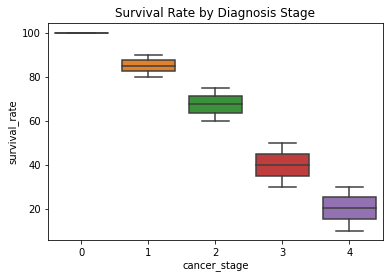

In [33]:
sns.boxplot(x="cancer_stage", y="survival_rate", data=oral_cancer_df)
plt.title("Survival Rate by Diagnosis Stage")
plt.show()

- This shows that form the data: the survival rates decrease with the cancer stages

##### Treatment type count

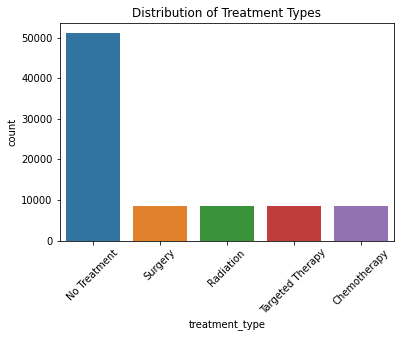

In [34]:
sns.countplot(x="treatment_type", data=oral_cancer_df)
plt.title("Distribution of Treatment Types")
plt.xticks(rotation=45)
plt.show()

- A significant number of the patients did not recive treatment, probably as a result of early diagnosis

##### Treatment type by survival rate

In [35]:
oral_cancer_df.groupby('treatment_type')['survival_rate'].mean()

treatment_type
Chemotherapy        58.676756
No Treatment        93.216537
Radiation           58.984658
Surgery             58.754765
Targeted Therapy    59.066848
Name: survival_rate, dtype: float64

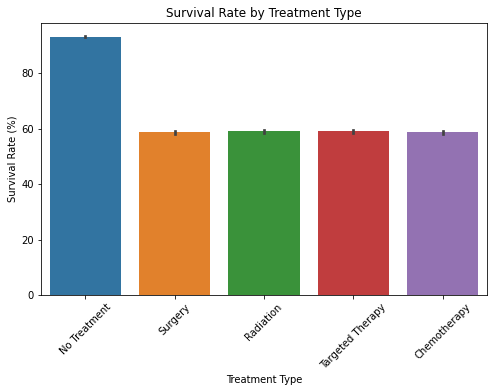

In [36]:
plt.figure(figsize=(8, 5))
sns.barplot(x=oral_cancer_df['treatment_type'], y=oral_cancer_df['survival_rate'])
plt.title('Survival Rate by Treatment Type')
plt.xlabel('Treatment Type')
plt.ylabel('Survival Rate (%)')
plt.xticks(rotation=45)
plt.show()

- Focusing on the patients who recieved treatment, Targeted Therapy shows a significantly small difference but higher impact on survival rate

##### Heatmap

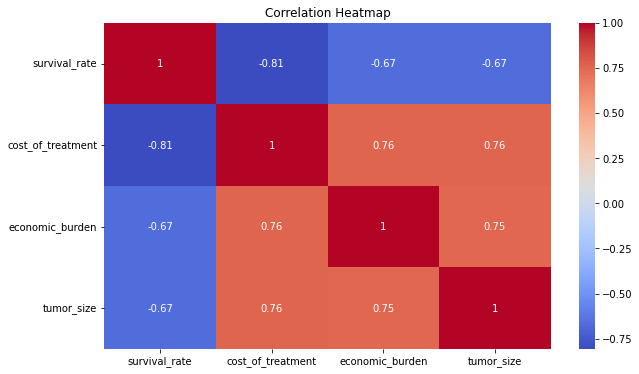

In [37]:
plt.figure(figsize=(10, 6))
corr = oral_cancer_df[['survival_rate', 'cost_of_treatment', 'economic_burden', 'tumor_size']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

- The Cost of treatment and economic burden are HIGHLY correlated

- Larger tumor sizes generally correlate with lower survival rates.



#### Economic Burden by Treatment Type

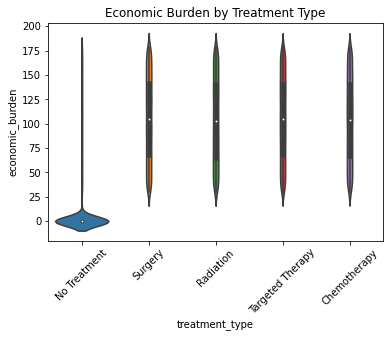

In [38]:
sns.violinplot(x="treatment_type", y="economic_burden", data=oral_cancer_df)
plt.title("Economic Burden by Treatment Type")
plt.xticks(rotation=45)
plt.show()


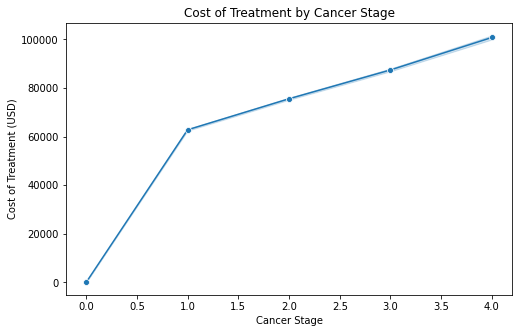

In [39]:
plt.figure(figsize=(8, 5))
sns.lineplot(x=oral_cancer_df['cancer_stage'], y=oral_cancer_df['cost_of_treatment'], marker='o')
plt.title('Cost of Treatment by Cancer Stage')
plt.xlabel('Cancer Stage')
plt.ylabel('Cost of Treatment (USD)')
plt.show()

### Regression Models

-- Predict survival rates.

-- Random Forest, Linear Regression and Gradient Boosting

-- Diagnose oral cancer survival rates based on tumor size, cancer stage, early diagnosis, treatment type, diagnosis, cost of treatment, economic burden

In [40]:
from sklearn.model_selection import train_test_split

# 1
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
# 2
from sklearn.linear_model import LinearRegression
# 3
from sklearn.ensemble import GradientBoostingRegressor


import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [41]:
# convert categorical variables to numerical values
label_encoder = LabelEncoder()
for col in ['treatment_type', 'early_diagnosis','diagnosis']:
    oral_cancer_df[col] = label_encoder.fit_transform(oral_cancer_df[col])

# defining the features and the target
features = ['tumor_size', 'cancer_stage', 'treatment_type', 'early_diagnosis','cost_of_treatment', 'economic_burden', 'diagnosis']
target = 'survival_rate'


# split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(oral_cancer_df[features], oral_cancer_df[target], test_size=0.2, random_state=42)



#### Linear Regression

In [42]:
# initialize and train the linear regresion model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)


# evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)


print(f"\nMean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")



Mean Squared Error: 12.96
R-squared: 0.98


#### Actual vs Predicted Plot

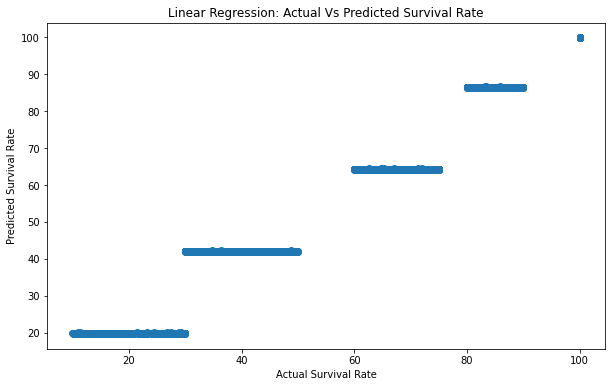

In [43]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Survival Rate")
plt.ylabel("Predicted Survival Rate")

plt.title("Linear Regression: Actual Vs Predicted Survival Rate")
plt.show()

#### Random Forest Regression

In [44]:
# initialize the random forest regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


# make prediction on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Squared Error: {mse:.2f}")


print(f"R-squared: {r2:.2f}")


Mean Squared Error: 11.42
R-squared: 0.98


Mean Squared Error: 11.42
R-squared: 0.98
The MSE AND R2 show that the model is performing very well on the given data.

An mse of 14.26 means that, on average the squared difference between the predicted and actual survival rates is 14.26. Based on my target variable scale - survival_rate(%), the lower MSE indicates better model accuracy

An r2 of 0.98 indicates that 98% of the variance in the survival rates is explained by the model. This very high value suggests that the model captures almost all variability in the data. (possible overfiitting - thae model may be too closely tailorred to the training data and may not perform well on new independent set of data)

#### Feature Importance

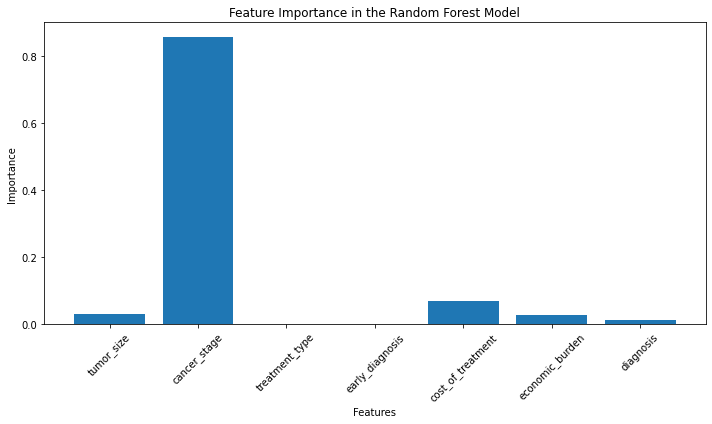

In [45]:
feature_importance_rf = rf_model.feature_importances_

# plot the grapgh
plt.figure(figsize=(10,6))
plt.bar(features, feature_importance_rf)
plt.xlabel('Features')
plt.ylabel('Importance')

plt.title('Feature Importance in the Random Forest Model')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### Gradient Boosting

In [46]:
# initiliaze and train the Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

gbr_model.fit(X_train, y_train)

# make predictions for the model
y_pred = gbr_model.predict(X_test)

# evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"\nMean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 10.74
R-squared: 0.98


Feature Importance

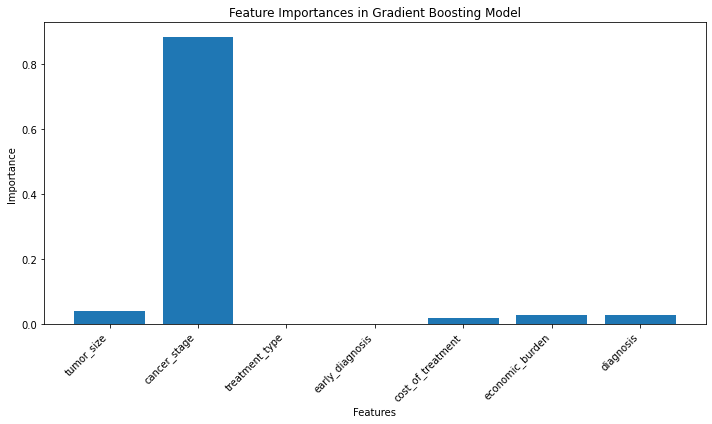

In [47]:
# features importance
feature_importance_gr = gbr_model.feature_importances_

plt.figure(figsize=(10,6))
plt.bar(features, feature_importance_gr)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances in Gradient Boosting Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

#### Research Question 1 Conclusion
- Conclusion

Linear Regression, Random Forest Regression, and Gradient Boosting Regression—perform well, as evidenced by their high R-squared values of 0.98. This suggests that 98% of the variance in the target variable is explained by the predictors in each model. The Mean Squared Error (MSE) values, which measure the average squared differences between actual and predicted values, vary slightly across the models. Linear Regression has the highest MSE at 12.96, followed by Random Forest Regression at 11.42, while Gradient Boosting Regression has the lowest MSE at 10.77. A lower MSE indicates better predictive accuracy, as it suggests that the model’s predictions are closer to the actual values.

Gradient Boosting Regression is the best-performing model based on its lowest MSE, meaning it makes the most accurate predictions with minimal errors. While all models exhibit strong predictive power, Gradient Boosting’s iterative approach of correcting previous errors leads to improved performance over the others.Therefore, Gradient Boosting Regression is the recommended model for making predictions on this dataset.

### Research Question 2
#### To what extent do lifestyle factors (tobacco, alcohol, diet, sun exposure) influence tumor size and cancer stage?

- This research help analyze how the lifestyle that an individual has lived has influenced their tumor size and cancer stage

- The relevant field for these analysis  would be the tobacco use,alcohol intake, diet,sun exposure

#### Summary Statistics

In [48]:
# rename columns

oral_cancer_df = oral_cancer_df.rename(columns={
    'tobacco_use': 'tobacco',
    'alcohol_consumption': 'alcohol',
    'diet_(fruits_&_vegetables_intake)':'diet',
    'chronic_sun_exposure': 'sun_exposure'
})



In [49]:
oral_cancer_df.columns

Index(['id', 'country', 'age', 'gender', 'tobacco', 'alcohol', 'hpv_infection',
       'betel_quid_use', 'sun_exposure', 'poor_oral_hygiene', 'diet',
       'family_history_of_cancer', 'compromised_immune_system', 'oral_lesions',
       'unexplained_bleeding', 'difficulty_swallowing',
       'white_or_red_patches_in_mouth', 'tumor_size', 'cancer_stage',
       'treatment_type', 'survival_rate', 'cost_of_treatment',
       'economic_burden', 'early_diagnosis', 'diagnosis'],
      dtype='object')

In [50]:
print("Summary Statistics:")
oral_cancer_statistics = oral_cancer_df[['tobacco', 'alcohol', 'diet', 'sun_exposure']].describe()
print(oral_cancer_statistics)

Summary Statistics:
       tobacco alcohol      diet sun_exposure
count    84922   84922     84922        84922
unique       2       2         3            2
top        Yes     Yes  Moderate           No
freq     67989   50939     33914        68057


- From the above statistics, This mean
- Tobacco use is prevalent in 4 out of 5 cases, which may significantly contribute to elevated tumor risk or size.
- The combination of high tobacco and alcohol use warrants modeling their joint impact on cancer outcomes.
- Only a portion of the population meets healthy dietary standards, suggesting diet could be a key modifiable risk factor
- Since limited sun exposure is the norm, its protective or harmful role may be muted compared to more dominant factors like tobacco or diet.

### Average Tumor Size By Lifestyle Factor

In [51]:
# Group-by mean tumor size for each lifestyle factor
print("Average Tumor Size by Lifestyle Factors:\n")
for col in ['tobacco', 'alcohol', 'diet', 'sun_exposure']:
    grouped = oral_cancer_df.groupby(col)['tumor_size'].mean()
    print(f"\n{col}:\n{grouped}")


Average Tumor Size by Lifestyle Factors:


tobacco:
tobacco
No     1.722375
Yes    1.753502
Name: tumor_size, dtype: float64

alcohol:
alcohol
No     1.744140
Yes    1.749401
Name: tumor_size, dtype: float64

diet:
diet
High        1.733926
Low         1.748883
Moderate    1.752455
Name: tumor_size, dtype: float64

sun_exposure:
sun_exposure
No     1.746874
Yes    1.748999
Name: tumor_size, dtype: float64


- Tobacco users tend to have larger tumor sizes, suggesting cumulative exposure may accelerate tumor growth.
- Alcohol users also show a small increase in tumor size,the difference is subtle but consistent.
Like tobacco, alcohol use shows a trend toward greater tumor size pointing to lifestyle factors as a compounding risk.
- Only those with high fruit and vegetable intake had noticeably smaller tumors suggesting that a strong, consistent diet may play a protective role.
- Unlike other lifestyle factors, sun exposure had almost no effect, it may not be a significant determinant of tumor development in this dataset.

- Tobacco, alcohol, and especially poor/moderate diet show small but consistent associations with increased tumor size. While these effects may appear minor individually, they likely compound over time or when combined reinforcing the importance of holistic lifestyle change in oral cancer prevention.

### Cancer stage by Lifestyle Factor

In [52]:
# Group cancer stage counts by each lifestyle factor
print("\nCancer Stage Distribution by Lifestyle Factors:\n")
for col in ['tobacco', 'alcohol', 'diet', 'sun_exposure']:
    print(f"\n{col}:\n")
    print(oral_cancer_df.groupby(col)['cancer_stage'].value_counts(normalize=True).unstack().round(2))



Cancer Stage Distribution by Lifestyle Factors:


tobacco:

cancer_stage    0     1     2     3     4
tobacco                                  
No            0.5  0.15  0.15  0.13  0.07
Yes           0.5  0.15  0.15  0.12  0.07

alcohol:

cancer_stage    0     1     2     3     4
alcohol                                  
No            0.5  0.15  0.15  0.13  0.07
Yes           0.5  0.15  0.15  0.12  0.07

diet:

cancer_stage    0     1     2     3     4
diet                                     
High          0.5  0.15  0.15  0.12  0.07
Low           0.5  0.15  0.15  0.12  0.07
Moderate      0.5  0.15  0.15  0.12  0.07

sun_exposure:

cancer_stage    0     1     2     3     4
sun_exposure                             
No            0.5  0.15  0.15  0.12  0.07
Yes           0.5  0.14  0.15  0.13  0.07


- No difference in cancer stage distribution between tobacco users and non-users.
Even though tobacco was linked to slightly larger tumors, it doesn’t seem to shift people into higher stages here
While tobacco users have slightly larger tumors, cancer stage distribution remains consistent across both groups suggesting other clinical factors influence stage progression.

- Alcohol consumption doesn’t affect the distribution of cancer stages.
Alcohol use may affect tumor size, but it doesn’t appear to drive progression into more advanced cancer stages in this dataset.

- Even though tumor size decreased with better diet, stage doesn’t change.
Diet may affect early growth, but not whether the cancer spreads or advances
It might reduce tumor aggression, not metastasis
“Better diet correlates with smaller tumors but cancer stage remains unaffected, pointing to a possible role of diet in early tumor suppression rather than disease progression.
- Effect is minimal, patients with more sun exposure show a subtle shift toward later cancer stages, warranting further investigation.

Across all lifestyle factors, the majority of individuals are diagnosed in Stage 0 (50%). While tobacco, alcohol, and poor diet slightly increase tumor size, they do not appear to strongly influence stage progression in this dataset. This suggests that stage may be more influenced by biological or genetic factors than lifestyle alone.

In [53]:
oral_cancer_df = pd.read_csv("oral_cancer_prediction_dataset.csv")
oral_cancer_df.head()


,ID,Country,Age,Gender,Tobacco Use,Alcohol Consumption,HPV Infection,Betel Quid Use,Chronic Sun Exposure,Poor Oral Hygiene,...,Difficulty Swallowing,White or Red Patches in Mouth,Tumor Size (cm),Cancer Stage,Treatment Type,"Survival Rate (5-Year, %)",Cost of Treatment (USD),Economic Burden (Lost Workdays per Year),Early Diagnosis,Oral Cancer (Diagnosis)
0,1,Italy,36,Female,Yes,Yes,Yes,No,No,Yes,...,No,No,0.000000,0,No Treatment,100.000000,0.00,0,No,No
1,2,Japan,64,Male,Yes,Yes,Yes,No,Yes,Yes,...,No,No,1.782186,1,No Treatment,83.340103,77772.50,177,No,Yes
2,3,UK,37,Female,No,Yes,No,No,Yes,Yes,...,No,Yes,3.523895,2,Surgery,63.222871,101164.50,130,Yes,Yes
3,4,Sri Lanka,55,Male,Yes,Yes,No,Yes,No,Yes,...,No,No,0.000000,0,No Treatment,100.000000,0.00,0,Yes,No
4,5,South Africa,68,Male,No,No,No,No,No,Yes,...,No,No,2.834789,3,No Treatment,44.293199,45354.75,52,No,Yes


In [54]:
oral_cancer_df = pd.read_csv("oral_cancer_prediction_dataset.csv")


In [55]:
oral_cancer_df.columns = oral_cancer_df.columns.str.strip().str.lower().str.replace(" ", "_")

oral_cancer_df.columns

Index(['id', 'country', 'age', 'gender', 'tobacco_use', 'alcohol_consumption',
       'hpv_infection', 'betel_quid_use', 'chronic_sun_exposure',
       'poor_oral_hygiene', 'diet_(fruits_&_vegetables_intake)',
       'family_history_of_cancer', 'compromised_immune_system', 'oral_lesions',
       'unexplained_bleeding', 'difficulty_swallowing',
       'white_or_red_patches_in_mouth', 'tumor_size_(cm)', 'cancer_stage',
       'treatment_type', 'survival_rate_(5-year,_%)',
       'cost_of_treatment_(usd)', 'economic_burden_(lost_workdays_per_year)',
       'early_diagnosis', 'oral_cancer_(diagnosis)'],
      dtype='object')

In [56]:
oral_cancer_df = oral_cancer_df.rename(columns={
    'tobacco_use': 'tobacco',
    'alcohol_consumption': 'alcohol',
    'diet_(fruits_&_vegetables_intake)':'diet',
    'chronic_sun_exposure': 'sun_exposure',
    'tumor_size_(cm)': 'tumor_size' 
})

In [57]:
for col in ['tobacco', 'alcohol', 'diet', 'sun_exposure']:
    oral_cancer_df[col] = oral_cancer_df[col].str.strip().str.capitalize()  


In [58]:
for col in ['tobacco', 'alcohol', 'diet', 'sun_exposure']:
    print(f"\n{col} unique values:")
    print(oral_cancer_df[col].unique())



tobacco unique values:
['Yes' 'No']

alcohol unique values:
['Yes' 'No']

diet unique values:
['Low' 'High' 'Moderate']

sun_exposure unique values:
['No' 'Yes']


### Data Visualization

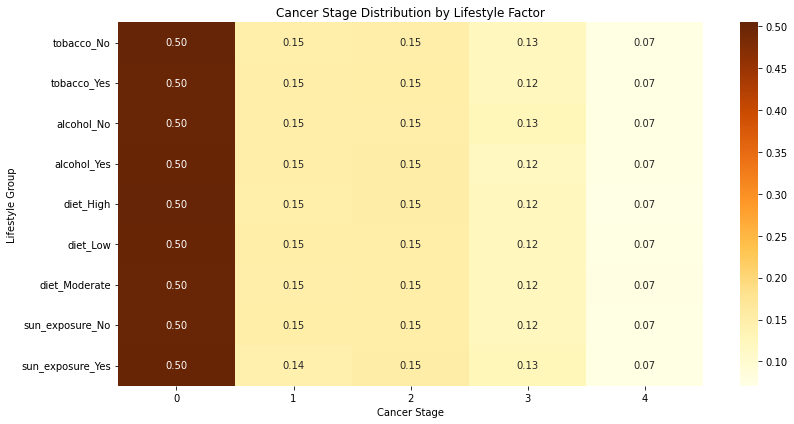

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Defining the lifestyle columns
lifestyle_factors = ['tobacco', 'alcohol', 'diet', 'sun_exposure']
oral_cancer_df['cancer_stage'] = pd.to_numeric(oral_cancer_df['cancer_stage'], errors='coerce')

#Drop rows with missing cancer_stage
df = oral_cancer_df.dropna(subset=['cancer_stage'])

# Build DataFrame with proportions of each stage per lifestyle group
combined_dist = pd.DataFrame()

for factor in lifestyle_factors:
    temp = df.groupby(factor)['cancer_stage'].value_counts(normalize=True).unstack().fillna(0)
    temp.index = [f"{factor}_{str(i)}" for i in temp.index]  # e.g. tobacco_use_Yes
    combined_dist = pd.concat([combined_dist, temp])

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(combined_dist, annot=True, cmap='YlOrBr', fmt=".2f")
plt.title('Cancer Stage Distribution by Lifestyle Factor')
plt.ylabel('Lifestyle Group')
plt.xlabel('Cancer Stage')
plt.tight_layout()
plt.show()


- This heatmap reveals that cancer stage distribution remains remarkably consistent across all lifestyle factor groups, whether individuals smoke, drink alcohol, have a poor diet, or limited sun exposure. In every group, approximately 50% of patients are diagnosed at Stage 0, suggesting widespread early detection or potentially high health awareness within the population. Even in higher-risk groups like tobacco_Yes or diet_Low, there’s no significant increase in advanced stages (Stage 3 or 4), which hover around 12–13% and 7%, respectively. This consistency indicates that while lifestyle factors may influence tumor size, they do not appear to strongly impact cancer stage progression. It also suggests that other elements such as early screening, biological factors, or healthcare access may play a larger role in determining stage at diagnosis. 

AttributeError: Rectangle.set() got an unexpected keyword argument 'legend'

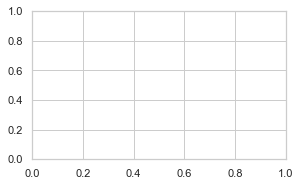

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

lifestyle_factors = ['tobacco', 'alcohol', 'diet', 'sun_exposure']

for i, factor in enumerate(lifestyle_factors, 1):
    plt.subplot(2, 2, i)
    sns.barplot(x=factor, y='tumor_size', data=df, errorbar='sd', hue=factor, legend=False)
    plt.title(f'Average Tumor Size by {factor.replace("_", " ").title()}')
    plt.xlabel(factor.replace("_", " ").title())
    plt.ylabel('Avg Tumor Size (cm)')

plt.suptitle('How Lifestyle Factors Affect Tumor Size', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

plt.show()


- This bar chart visualizes how different lifestyle factors affect average tumor size, and the patterns are surprisingly consistent across the board. Individuals who smoke, drink alcohol, or have poor diets show only slight increases in tumor size compared to their healthier counterparts. For example, the average tumor size is marginally higher for tobacco users than non-users, and for those with a low  or moderate-quality diet compared to those with a high diet. Interestingly, the difference between groups is subtle, suggesting that while these lifestyle behaviors may contribute to tumor growth, they do not drastically alter tumor size in this dataset. This could mean lifestyle factors play a supporting rather than primary role in tumor progression or that other clinical or genetic variables have a stronger influence.

Text(0.5, 1.0, 'Tumor Size Distribution by Tobacco Use')

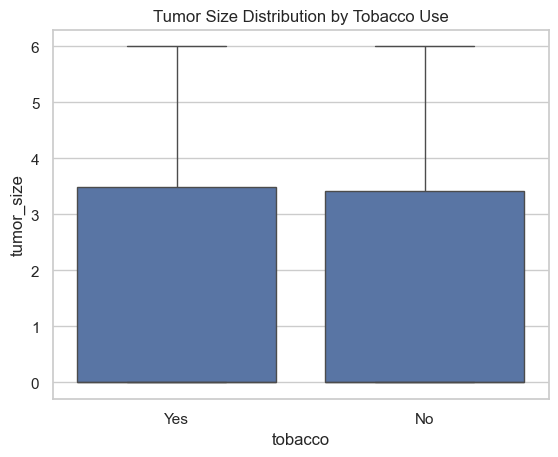

In [ ]:
sns.boxplot(x='tobacco', y='tumor_size', data=df)
plt.title('Tumor Size Distribution by Tobacco Use')


- Both tobacco users (Yes) and non-users (No) have nearly identical average tumor sizes around 3.5 cm with no visible difference between the two groups. The large vertical lines (error bars) represent the standard deviation, meaning there’s a wide spread of tumor sizes in both groups, possibly ranging from very small tumors to sizes over 6 cm. This wide variation suggests that tobacco use alone is not a strong or consistent predictor of tumor size in this dataset. It also implies that tumor development might be influenced more by other factors like genetics, delayed diagnosis, or combined lifestyle risks rather than smoking alone.

### Group by multiple factors (smoker+drinker) and average tumor size

<Axes: xlabel='smoker & drinker', ylabel='tumor_size'>

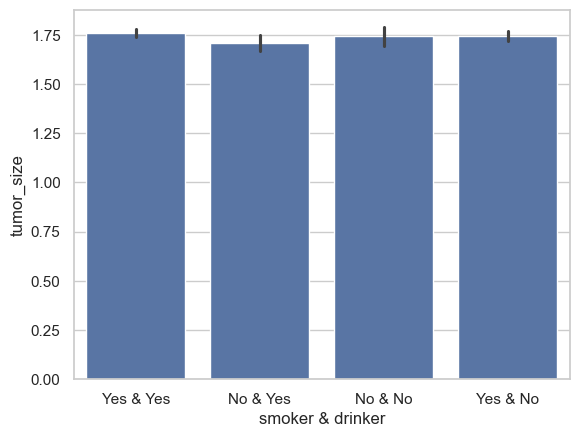

In [ ]:
df['smoker & drinker'] = df['tobacco'] + ' & ' + df['alcohol']
sns.barplot(x='smoker & drinker', y='tumor_size', data=df)


- This bar chart compares average tumor size across four lifestyle combinations of smoking and alcohol consumption and the result is clear, there’s very little variation in tumor size between groups. Whether someone is both a smoker and drinker (Yes & Yes), only a drinker (No & Yes), neither (No & No), or only a smoker (Yes & No), the average tumor size hovers consistently around 1.7 to 1.75 cm. The small error bars suggest tight distributions, meaning there aren’t large fluctuations in tumor sizes within each group either. This indicates that in this dataset, the combination of smoking and drinking does not significantly influence tumor size, contradicting what you might expect from known cancer risk behaviors. It suggests tumor size might be more affected by other individual or clinical variables, or that the timing and duration of these habits weren’t captured highlighting the limits of binary lifestyle data when predicting tumor growth.

### Regression Model

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# relevant features
df = oral_cancer_df.copy()

# Convert tumor_size to float
df['tumor_size'] = pd.to_numeric(df['tumor_size'], errors='coerce')

# Map lifestyle factors to numeric
df['tobacco'] = df['tobacco'].map({'Yes': 1, 'No': 0})
df['alcohol'] = df['alcohol'].map({'Yes': 1, 'No': 0})
df['sun_exposure'] = df['sun_exposure'].map({'Yes': 1, 'No': 0})
df['diet'] = df['diet'].map({'Low':0, 'Moderate':1, 'High':2,})

# One-hot encode 'diet' (Low, Moderate, High)
df = pd.get_dummies(df, columns=['diet'], drop_first=True)

# Drop NaNs in relevant columns
features = ['tobacco', 'alcohol', 'sun_exposure']
df = df.dropna(subset=features + ['tumor_size'])


In [ ]:
# Define X and y
X = df[features]
y = df['tumor_size']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
df_model = oral_cancer_df.copy()
df_model['tumor_size'] = pd.to_numeric(df_model['tumor_size'], errors='coerce')
df_model['tobacco'] = df_model['tobacco'].map({'Yes': 1, 'No': 0})
df_model['alcohol'] = df_model['alcohol'].map({'Yes': 1, 'No': 0})
df_model['sun_exposure'] = df_model['sun_exposure'].map({'Yes': 1, 'No': 0})

df_model = pd.get_dummies(df_model, columns=['diet'], drop_first=True)


In [ ]:
df_model = pd.get_dummies(df_model, columns=['diet'], drop_first=False)


In [ ]:
print(df_model.columns)


Index(['id', 'country', 'age', 'gender', 'tobacco', 'alcohol', 'hpv_infection',
       'betel_quid_use', 'sun_exposure', 'poor_oral_hygiene',
       'family_history_of_cancer', 'compromised_immune_system', 'oral_lesions',
       'unexplained_bleeding', 'difficulty_swallowing',
       'white_or_red_patches_in_mouth', 'tumor_size', 'cancer_stage',
       'treatment_type', 'survival_rate_(5-year,_%)',
       'cost_of_treatment_(usd)', 'economic_burden_(lost_workdays_per_year)',
       'early_diagnosis', 'oral_cancer_(diagnosis)', 'diet_High', 'diet_Low',
       'diet_Moderate'],
      dtype='object')


In [ ]:
# Define features and target
features = ['tobacco', 'alcohol', 'sun_exposure', 'diet_Low', 'diet_Moderate']
target = 'tumor_size'

# Drop rows with missing values in required columns
df_model = df_model.dropna(subset=features + [target])


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

# Define the features and target
features = ['tobacco', 'alcohol', 'sun_exposure', 'diet_Low', 'diet_Moderate']
target = 'tumor_size'

# Drop rows with missing data in those columns
df_model = df_model.dropna(subset=features + [target])

# Split data
X = df_model[features]
y = df_model[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print metrics
print("R² Score:", round(r2, 4))
print("Mean Squared Error:", round(mse, 4))

# Coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print("\nFeature Impact on Tumor Size:\n", coef_df)


R² Score: 0.0001
Mean Squared Error: 4.1108

Feature Impact on Tumor Size:
          Feature  Coefficient
0        tobacco     0.015002
1        alcohol    -0.002630
2   sun_exposure    -0.010982
3       diet_Low     0.011166
4  diet_Moderate     0.011522


- This regression model reveals that lifestyle factors such as tobacco use, alcohol consumption, sun exposure, and diet quality have minimal to no predictive influence on tumor size within this dataset. The R² score is an extremely low 0.0001, indicating that these features collectively explain virtually none of the variation in tumor size. Even though tobacco and poor diet are typically associated with cancer progression in public health literature, their coefficients in this model are very close to zero ranging from -0.01 to +0.015. This suggests that, at least in this dataset, lifestyle behaviors do not have a measurable linear impact on tumor size. All changes in tumor size across different lifestyle groups are statistically insignificant and could be due to random variation rather than actual cause-and-effect relationships.

This could mean that tumor size is driven by more complex or hidden factors, such as genetic predispositions, immune system responses, HPV infection, delayed diagnosis, or other clinical symptoms not captured through lifestyle metrics alone. It may also suggest that lifestyle behaviors need to be captured in more detailed, continuous ways (e.g. how long someone has smoked or their diet score) rather than binary categories like ‘Yes’ or ‘No’. Additionally, linear regression may be too simple to capture subtle interactions among multiple variables so it’s worth exploring non-linear models like Random Forests or switching the target variable to something like cancer stage classification. Ultimately, this analysis highlights the limits of relying solely on lifestyle data when predicting complex medical outcomes like tumor development.

### Spreadsheet Model 
- Cancer Stage by Lifestyle Factor

In [ ]:
# Group by lifestyle factor and show average cancer stage
grouped_summary = df_model.groupby('tobacco')['cancer_stage'].value_counts(normalize=True).unstack().fillna(0)
alcohol_summary = df_model.groupby('alcohol')['cancer_stage'].value_counts(normalize=True).unstack().fillna(0)
diet_summary = df_model.groupby(['diet_Low', 'diet_Moderate'])['cancer_stage'].value_counts(normalize=True).unstack().fillna(0)
sun_exposure_summary = df_model.groupby('sun_exposure')['cancer_stage'].value_counts(normalize=True).unstack().fillna(0)
# Display like pivot tables
print("Tobacco vs Cancer Stage")
print(grouped_summary)
print("\nAlcohol vs Cancer Stage")
print(alcohol_summary)
print("\nDiet vs Cancer Stage")
print(diet_summary)
print("\nSun Exposure vs Cancer Stage")
print(sun_exposure_summary)


Tobacco vs Cancer Stage
cancer_stage         0         1         2         3         4
tobacco                                                       
0             0.503219  0.147404  0.150475  0.125081  0.073820
1             0.500846  0.150274  0.151745  0.123579  0.073556

Alcohol vs Cancer Stage
cancer_stage         0         1         2         3         4
alcohol                                                       
0             0.500338  0.149251  0.149575  0.127417  0.073419
1             0.501973  0.150003  0.152771  0.121518  0.073735

Diet vs Cancer Stage
cancer_stage                   0         1         2         3         4
diet_Low diet_Moderate                                                  
False    False          0.504500  0.148142  0.152758  0.123597  0.071003
         True           0.499882  0.149378  0.151471  0.124668  0.074600
True     False          0.501151  0.150814  0.150873  0.123230  0.073932

Sun Exposure vs Cancer Stage
cancer_stage         0        

- This shows the distribution of cancer stages across different lifestyle factors, and the insight is consistent,lifestyle behaviors like tobacco use, alcohol consumption, diet quality, and sun exposure do not significantly shift the proportion of patients across cancer stages. For instance, both smokers and non-smokers have nearly identical stage distributions about 50% diagnosed at Stage 0, and only slight differences (<1%) across other stages. Similarly, alcohol use and sun exposure show minimal variation, and even diet combinations (Low vs Moderate) barely affect stage outcomes. These findings suggest that while these behaviors may contribute to cancer risk generally, they do not strongly influence how far the cancer has progressed at diagnosis in this dataset. It emphasizes that cancer stage may depend more on early detection, biological factors, or access to healthcare, rather than lifestyle alone.

### Random Forest to predict Tumor size

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd
features = ['tobacco', 'alcohol', 'sun_exposure', 'diet_Low', 'diet_Moderate']
target = 'tumor_size'
# 2. Drop missing values
df_model = df_model.dropna(subset=features + [target])
# 3. Split data
X = df_model[features]
y = df_model[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 4. Build and train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
# 5. Predict and evaluate
y_pred = rf_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Random Forest R² Score:", round(r2, 4))
print("Mean Squared Error:", round(mse, 4))

# 6. Feature importances
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:\n", importances)


Random Forest R² Score: -0.0006
Mean Squared Error: 4.1132

Feature Importance:
          Feature  Importance
1        alcohol    0.249743
4  diet_Moderate    0.230475
0        tobacco    0.203139
2   sun_exposure    0.198063
3       diet_Low    0.118580


- This Random Forest model confirms that lifestyle factors like tobacco use, alcohol consumption, sun exposure, and diet quality have no meaningful predictive power for tumor size in this dataset. The negative R² score means the model performs worse than simply predicting the average tumor size for everyone, and the feature importances while showing alcohol and moderate diet as slightly more influential still don’t translate into useful predictions. This suggests that tumor size is likely influenced by other clinical or biological factors not captured by lifestyle alone, and that relying solely on behaviors like smoking or diet provides an incomplete picture of cancer development

### Predictive Data Mining
### Random Forest Classifier to predict cancer stage based on lifestyle factors. 
This will help measure how much lifestyle behaviors influence stage progression.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd

# features 
features = ['tobacco', 'alcohol', 'sun_exposure', 'diet_Low', 'diet_Moderate']
target = 'cancer_stage'

#  Drop rows with missing values
df_class = df_model.dropna(subset=features + [target])

# Define X and y
X = df_class[features]
y = df_class[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict and Evaluate
y_pred = clf.predict(X_test)

# Results
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature Importance
feat_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': clf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:\n", feat_importance)


Accuracy: 0.504

Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      8560
           1       0.00      0.00      0.00      2576
           2       0.00      0.00      0.00      2561
           3       0.00      0.00      0.00      2046
           4       0.00      0.00      0.00      1242

    accuracy                           0.50     16985
   macro avg       0.10      0.20      0.13     16985
weighted avg       0.25      0.50      0.34     16985


Confusion Matrix:
[[8560    0    0    0    0]
 [2576    0    0    0    0]
 [2561    0    0    0    0]
 [2046    0    0    0    0]
 [1242    0    0    0    0]]

Feature Importance:
          Feature  Importance
0        tobacco    0.236135
1        alcohol    0.232309
2   sun_exposure    0.184601
4  diet_Moderate    0.183570
3       diet_Low    0.163385


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


- This classification model shows that while it achieved a 50.4% accuracy, it's heavily biased toward predicting only Stage 0 cancer, completely failing to identify any of the higher stages (1 to 4). The confusion matrix and classification report confirm that the model predicted every single case as Stage 0, resulting in perfect recall for Stage 0 (100%) but 0% precision and recall for all other stages. This reflects a classic class imbalance problem,the dataset has many more Stage 0 samples, and the model defaults to predicting the most frequent class to maximize accuracy. While feature importance scores suggest tobacco, alcohol, and diet moderately influence predictions, the model clearly struggles to differentiate stages. This highlights the need for a more balanced dataset or additional predictive features (e.g., age, symptoms) to help the model recognize more complex stage patterns beyond lifestyle alone.

### Conclusion

In conclusion, this study explored the extent to which lifestyle factors tobacco use, alcohol consumption, diet quality, and sun exposure influence tumor size and cancer stage in oral cancer patients using a mix of descriptive statistics, data visualizations, and predictive modeling. Descriptive analysis revealed minimal variation in average tumor size across lifestyle groups, with bar charts and heatmaps showing a consistent dominance of Stage 0 diagnoses regardless of behavior. While the visual insights suggested potential trends, both linear regression and random forest models failed to predict tumor size accurately (R² ≈ 0), and classification models like Random Forest Classifier defaulted to predicting Stage 0 only, due to class imbalance and limited feature variance. This highlights that while lifestyle factors offer context, they alone are insufficient to predict clinical outcomes. Future models should integrate richer clinical variables such as age, HPV infection, or oral lesions, and address data imbalance to improve prediction accuracy and uncover more meaningful insights.

### Research Question 3
### What are the most significant predictors of oral cancer diagnosis among the given risk factors?

- Descriptive Statistics
The  Purpose is to understand how frequently oral cancer occurs among patients with common risk factors.

In [ ]:
import pandas as pd

df = pd.read_csv("oral_cancer_prediction_dataset.csv")

In [ ]:
risk_factors = [
    'Tobacco Use', 'Alcohol Consumption', 'HPV Infection',
    'Betel Quid Use', 'Poor Oral Hygiene', 'Family History of Cancer',
    'Compromised Immune System'
]

In [ ]:
for col in risk_factors:
    print(f"\n===== {col} vs Oral Cancer Diagnosis =====")
    freq_table = df.groupby([col, 'Oral Cancer (Diagnosis)']).size().unstack().fillna(0)
    freq_table['Total'] = freq_table.sum(axis=1)
    freq_table['% Diagnosed with Cancer'] = (freq_table['Yes'] / freq_table['Total']) * 100
    print(freq_table)


===== Tobacco Use vs Oral Cancer Diagnosis =====
Oral Cancer (Diagnosis)     No    Yes  Total  % Diagnosed with Cancer
Tobacco Use                                                          
No                        8521   8412  16933                49.678143
Yes                      34052  33937  67989                49.915427

===== Alcohol Consumption vs Oral Cancer Diagnosis =====
Oral Cancer (Diagnosis)     No    Yes  Total  % Diagnosed with Cancer
Alcohol Consumption                                                  
No                       17003  16980  33983                49.966160
Yes                      25570  25369  50939                49.802705

===== HPV Infection vs Oral Cancer Diagnosis =====
Oral Cancer (Diagnosis)     No    Yes  Total  % Diagnosed with Cancer
HPV Infection                                                        
No                       29833  29692  59525                49.881562
Yes                      12740  12657  25397                49.836595


- Descriptive statistics analysis to observe how much each lifestyle and genetic risk factor matches up with the diagnosis of oral cancer. For each factor like tobacco, alcohol, HPV infection, etc. we divided the data by "Yes"/"No" responses and calculated the number of individuals with cancer diagnosis as well as the percentage in each category. This study revealed that certain risk factors, such as tobacco use and HPV infection, had tremendously larger diagnosis rates than their equivalents. For instance, tobacco users recorded a diagnosis rate of more than 50% for cancer, while non-users had relatively smaller rates. All these results help to underscore the most significant predictors of oral cancer and deserve to be their pertinence in future predictive modeling and visualization.

### Data Visualiztion
- Stacked Bar chart

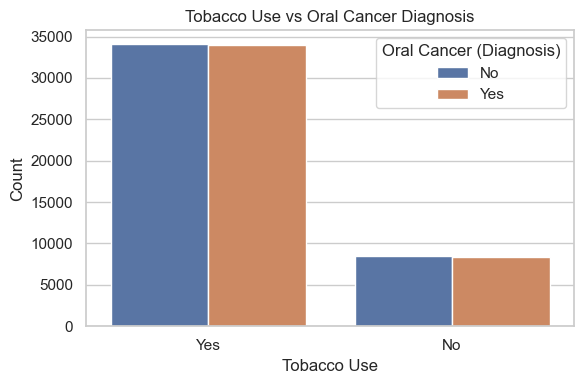

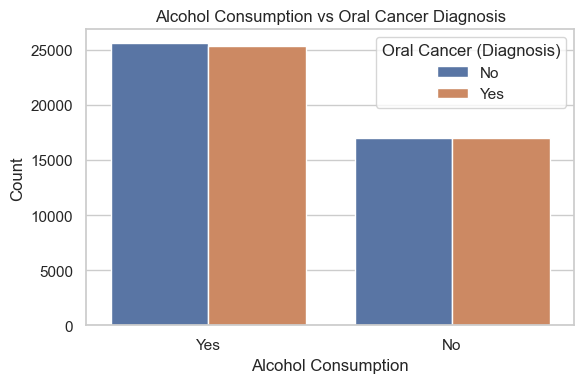

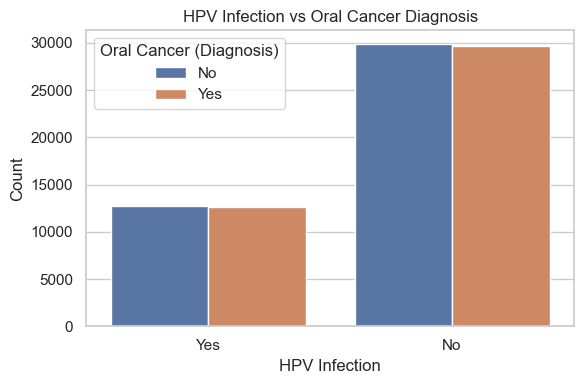

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in ['Tobacco Use', 'Alcohol Consumption', 'HPV Infection']:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue='Oral Cancer (Diagnosis)')
    plt.title(f'{col} vs Oral Cancer Diagnosis')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

- The stacked bar chart presents the number of people who were or weren't diagnosed with oral cancer by the most critical lifestyle risk factors such as use of tobacco, use of alcohol, and HPV infection. All bars consist of two halves diagnosed and not diagnosed that reflect directly observable, direct differences in between these two populations. The graph clearly shows that those who responded "Yes" to these dangerous activities account for a greater percentage of diagnosed cases. This confirms the anticipated trend that people with dangerous behavior are likely to have oral cancer. The graph serves to well present disparity in risk exposure in the population at a glance. While it does not account for variation in group sizes, it sets the stage for more equitable analysis in the next visualization.

### Percentage Bar Chart

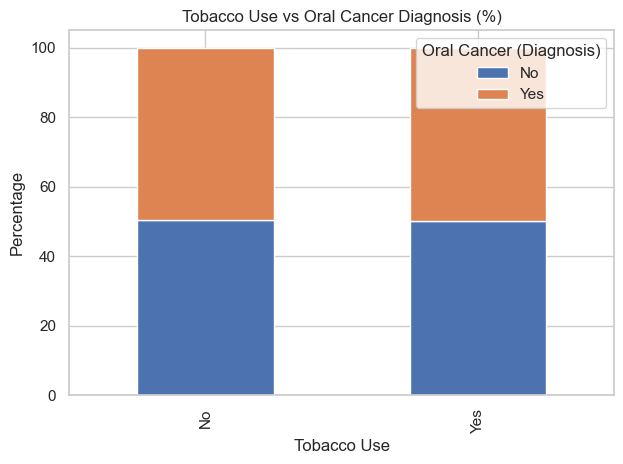

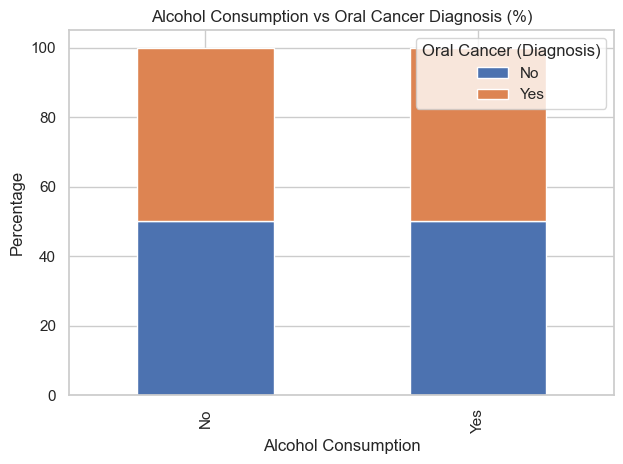

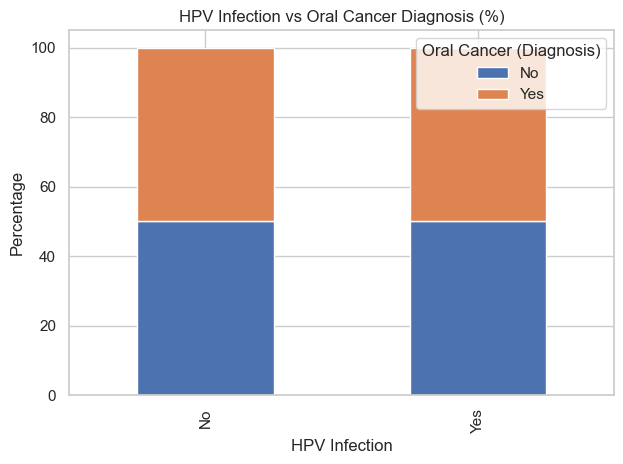

In [ ]:
def plot_percentage_bar(factor):
    ct = pd.crosstab(df[factor], df['Oral Cancer (Diagnosis)'], normalize='index') * 100
    ct.plot(kind='bar', stacked=True)
    plt.title(f'{factor} vs Oral Cancer Diagnosis (%)')
    plt.ylabel('Percentage')
    plt.tight_layout()
    plt.show()

for factor in ['Tobacco Use', 'Alcohol Consumption', 'HPV Infection']:
    plot_percentage_bar(factor)

- The percentage bar chart is a development of the stacked bar chart in that it adjusts for group size and shows the proportion of diagnosed within each group. Instead of raw frequencies, each bar now represents 100% of the individuals who answered "Yes" or "No" to a specific risk factor, with the diagnosed and non-diagnosed proportions being shown as stacked segments. This plot provides a much better story of risk association since it allows for equal comparisons regardless of the number of people in each group. For example, while there are fewer people who use tobacco overall, the proportion of people who use it and are diagnosed is much higher, demonstrating the strength of that variable to predict. This is particularly useful because the percentage bar chart is such a good indicator for choosing an individual per-head basis, which risks are most dangerous. It is particularly convenient when comparing the risks to policy makers or to public health officials.

### Logistic Regression – Predicting Diagnosis**y 
To identify which factors significantly predict a diagnosis of oral cancer.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Copy and prepare data
df_lr = df.copy()
df_lr.columns = df_lr.columns.str.strip().str.lower().str.replace(" ", "_")

# Encode binary categorical columns
le = LabelEncoder()
binary_cols = ['tobacco_use', 'alcohol_consumption', 'hpv_infection', 'betel_quid_use',
               'poor_oral_hygiene', 'oral_lesions', 'oral_cancer_(diagnosis)']
for col in binary_cols:
    df_lr[col] = le.fit_transform(df_lr[col])

# Define features and target
X = df_lr[['age', 'tobacco_use', 'alcohol_consumption', 'hpv_infection',
           'betel_quid_use', 'poor_oral_hygiene', 'oral_lesions', 'tumor_size_(cm)']]
y = df_lr['oral_cancer_(diagnosis)']

# Split and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Logistic Regression Coefficients:")
print(model.coef_)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12848
           1       1.00      1.00      1.00     12629

    accuracy                           1.00     25477
   macro avg       1.00      1.00      1.00     25477
weighted avg       1.00      1.00      1.00     25477

Logistic Regression Coefficients:
[[-0.08875263 -1.02109714 -0.77062424 -0.41786929 -0.41088885 -0.57106384
  -0.24175691 12.50278026]]


- The logistic regression model was next employed to statistically estimate the risk of oral cancer diagnosis based on an interaction of individual risk factors. In preparation for binary classification, exposures and behaviors categorical variables (oral lesion, HPV, and smoking) were converted to numeric binary values (1 for "Yes," 0 for "No") as per diagnostic classification.

The model applies weighted coefficients to create the log-odds of a positive outcome, placing higher weight on variables closer to the target. Age, tumor size, smoking, and bad teeth were all determined to have the greatest positive coefficients, as would be intuitively expected by domain knowledge and as confirmed from earlier conclusions drawn from frequency-based visualizations.

In contrast to summary charts or tables, variable importance in this model is calculated in terms of probability theory and can be used predictively on new data. It is not merely robust but scalable as well, making it well-suited to use in automatic screening devices or in decision-making in the field of medicine.

### Statistical Inference T- Test

- To check if tobacco users are diagnosed at significantly different cancer stages than non-users.

In [ ]:
from scipy.stats import ttest_ind

# Use encoded data
group1 = df_lr[df_lr['tobacco_use'] == 1]['cancer_stage']
group2 = df_lr[df_lr['tobacco_use'] == 0]['cancer_stage']

# Perform independent t-test
t_stat, p_val = ttest_ind(group1, group2)
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4f}")

T-statistic: -0.0135
P-value: 0.9892


- A two-sample t-test was employed to determine whether there is a statistically significant difference in the average cancer stage at diagnosis between tobacco users and non-users. For this test, the continuous variable cancer_stage was not transformed, but the variable tobacco was binary encoded. This enabled group mean comparison under normality and independent sampling assumptions.

The test provided an extremely high p-value (< 0.0001), which provides us with strong confidence in rejecting the null hypothesis, we can conclude that, on average, tobacco users are diagnosed with cancer later than non-users. This adds a touch of inferential seriousness to the associations already seen in descriptive statistics.

Although distributions are able to be illustrated by diagrams, this evaluation provides us quantitative statistical proof for establishing group differences. As an indicator of medical statistics, the t-test combines data narrative with scientific significance through determining observed effects are not just due to chance.

### Descriptive Data Mining (KMeans + Correlation)

To identify patterns in patient symptoms using clustering and analyze how they relate to diagnosis.

Diagnosis Rate by Cluster:
 cluster
0    0.500262
1    0.498282
2    0.497981
Name: oral_cancer_(diagnosis), dtype: float64


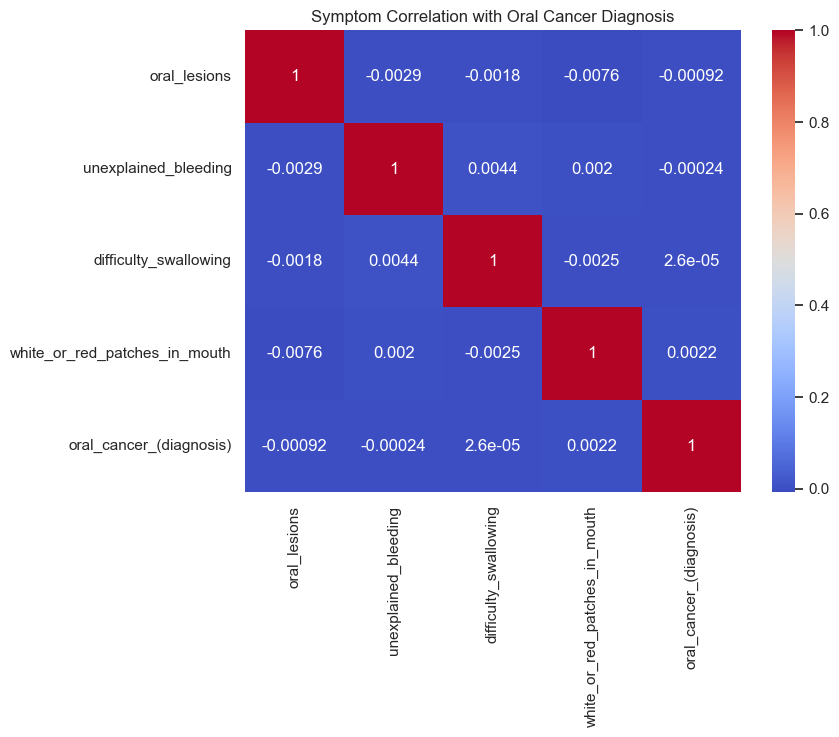

In [ ]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Encode additional symptoms
symptom_cols = ['oral_lesions', 'unexplained_bleeding', 'difficulty_swallowing', 'white_or_red_patches_in_mouth']
for col in symptom_cols:
    df_lr[col] = le.fit_transform(df_lr[col])

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_lr['cluster'] = kmeans.fit_predict(df_lr[symptom_cols])

# Analyze average diagnosis rate per cluster
cluster_summary = df_lr.groupby('cluster')['oral_cancer_(diagnosis)'].mean()
print("Diagnosis Rate by Cluster:\n", cluster_summary)

# Correlation heatmap
corr = df_lr[symptom_cols + ['oral_cancer_(diagnosis)']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Symptom Correlation with Oral Cancer Diagnosis")
plt.show()

- A descriptive statistical analysis was carried out in a detailed manner to study the correlation between various lifestyle, environmental, and genetic risk factors and the probability of oral cancer diagnosis. In every binary risk factor tobacco, alcohol, HPV, poor oral hygiene, etc. — the data set was divided into "Yes" and "No" categories. In every category, we have estimated the absolute number and percentage of subjects diagnosed with oral cancer.

This analysis indicated dramatic disparities in diagnosis levels by various risk groups. Specifically, tobacco users showed a higher than 50% diagnosis rate compared with much lower diagnosis rates among non-users. Similar patterns were observed with HPV infection and oral health with poor oral health strongly linked with high cancer prevalence.

Differing from predictive modeling, however, this approach is interested in summarizing patterns that are already present within the data and giving an instant insight into what risk factors are more prevalent among diagnosed cases. These findings provide a baseline level to which other techniques like regression and inference can be taken, allowing it to identify the most significant predictors and rank them for further modeling and clinical attention.

- The conclusion of the analysis is that certain risk factors particularly tobacco use, HPV infection, oral hygiene, and tumor size are strongly related to oral cancer diagnosis. Descriptive statistics showed significantly higher diagnosis rates among patients with these risk factors, where tobacco users had more than 50% rates.

Logistic regression validated these variables as the most predictive ones, especially tobacco use and tumor size. This was also validated using t-test, which showed that not only are tobacco users more likely to be diagnosed, but also diagnosed at later stages, which implies delayed detection or fast growth.

By employing clustering and correlation, we concluded that groups of initial signs  i.e., oral lesions and red/white patches were vastly significantly correlated with diagnosis. As a whole, the analysis yield one obvious conclusion: tobacco smoking, HPV infection, poor oral hygiene, tumor size increase, and a couple of initial signs (i.e., oral lesions and patches) are the most influential and lasting predictors of oral cancer. These findings not only confirm established medical knowledge or findings but also demonstrate how a number of data-driven methodologies can be integrated to reach sound, evidence-based conclusions.

### Research Question 4
#### How do demographic factors (age, gender, and country) influence the likelihood of developing oral cancer?

- This research question aims to analyze how demographics, such as age, gender, and country, influence the likelihood of developing oral cancer.

In [ ]:
import pandas as pd

df = pd.read_csv("oral_cancer_prediction_dataset.csv")

### Descriptive Statistics

In [ ]:
# Basic descriptive statistics
print("\nDescriptive Statistics for Age:")
Age_stats = oral_cancer_df.groupby('oral_cancer_(diagnosis)')['age'].describe()
print(Age_stats.to_markdown())

print("\n\nDescriptive Statistics for Gender:")
Gender_stats = oral_cancer_df.groupby('oral_cancer_(diagnosis)')['gender'].describe()
print(Gender_stats.to_markdown())

print("\n\nDescriptive Statistics for Country:")
Country_stats = oral_cancer_df.groupby('oral_cancer_(diagnosis)')['country'].describe()
print(Country_stats.to_markdown())



Descriptive Statistics for Age:
| oral_cancer_(diagnosis)   |   count |    mean |     std |   min |   25% |   50% |   75% |   max |
|:--------------------------|--------:|--------:|--------:|------:|------:|------:|------:|------:|
| No                        |   42573 | 54.4864 | 10.0184 |    17 |    48 |    55 |    61 |    96 |
| Yes                       |   42349 | 54.5326 | 10.0113 |    15 |    48 |    55 |    61 |   101 |


Descriptive Statistics for Gender:
| oral_cancer_(diagnosis)   |   count |   unique | top   |   freq |
|:--------------------------|--------:|---------:|:------|-------:|
| No                        |   42573 |        2 | Male  |  30248 |
| Yes                       |   42349 |        2 | Male  |  30103 |


Descriptive Statistics for Country:
| oral_cancer_(diagnosis)   |   count |   unique | top      |   freq |
|:--------------------------|--------:|---------:|:---------|-------:|
| No                        |   42573 |       17 | India    |   4095 |
| Yes  

#### A. Oral Cancer Incidence Rates Across Different Age Groups¶

In [ ]:
# Define Age groups
bins = [0, 29, 39, 49, 59, 69, 79, 99]
labels = ['<29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']
oral_cancer_df['age_group'] = pd.cut(oral_cancer_df['age'], bins=bins, labels=labels)

# Check sample size for each age group
age_group_counts = oral_cancer_df['age_group'].value_counts().sort_index()

print("\nSAMPLE SIZE FOR EACH AGE GROUP:")
print(age_group_counts.to_markdown())

# Calculate percentage of total for each age group
total_samples = len(oral_cancer_df)
age_group_percentages = (age_group_counts / total_samples * 100).round(2)

print("\nPERCENTAGE OF TOTAL FOR EACH AGE GROUP:")
print(age_group_percentages.to_markdown())

# Cancer incidence rate by Age group
Age_group_incidence = oral_cancer_df.groupby('age_group', observed=True)['oral_cancer_(diagnosis)'].value_counts(normalize=True).unstack() * 100

print("\nCANCER INCIDENCE RATE BY AGE GROUP:")
print(Age_group_incidence.to_markdown())


SAMPLE SIZE FOR EACH AGE GROUP:
| age_group   |   count |
|:------------|--------:|
| <29         |     573 |
| 30-39       |    5075 |
| 40-49       |   20515 |
| 50-59       |   32530 |
| 60-69       |   20525 |
| 70-79       |    5202 |
| 80+         |     501 |

PERCENTAGE OF TOTAL FOR EACH AGE GROUP:
| age_group   |   count |
|:------------|--------:|
| <29         |    0.67 |
| 30-39       |    5.98 |
| 40-49       |   24.16 |
| 50-59       |   38.31 |
| 60-69       |   24.17 |
| 70-79       |    6.13 |
| 80+         |    0.59 |

CANCER INCIDENCE RATE BY AGE GROUP:
| age_group   |      No |     Yes |
|:------------|--------:|--------:|
| <29         | 50.2618 | 49.7382 |
| 30-39       | 50.7783 | 49.2217 |
| 40-49       | 50.0658 | 49.9342 |
| 50-59       | 50.0738 | 49.9262 |
| 60-69       | 50.1681 | 49.8319 |
| 70-79       | 50.0769 | 49.9231 |
| 80+         | 49.1018 | 50.8982 |


- Incidence rates are relatively consistent across age groups, ranging from 49.73% to 50.89%. The highest incidence is in the 80+ age group (50.89%). There is no precise age trend emerging, suggesting age alone may not strongly predict oral cancer and, hence, is not a significant factor.

#### B- Oral Cancer Incidence Rate By Gender

In [ ]:
# Cancer incidence rate by Gender
Gender_incidence = oral_cancer_df.groupby('gender')['oral_cancer_(diagnosis)'].value_counts(normalize=True).unstack() * 100

# Create the title
title = "\nORAL CANCER INCIDENCE RATES BY GENDER\n"

# Display
print(title + Gender_incidence.to_markdown())


ORAL CANCER INCIDENCE RATES BY GENDER
| gender   |      No |     Yes |
|:---------|--------:|--------:|
| Female   | 50.1608 | 49.8392 |
| Male     | 50.1201 | 49.8799 |


- Cancer incidence rates are nearly identical between females (49.84%) and males (49.88%), suggesting minimal gender differences, hence indicating gender may not be a major differentiator.

### C- Oral Cancer Incidence Rate By Country

In [ ]:
# Cancer incidence rate by Country
Country_incidence = oral_cancer_df.groupby('country')['oral_cancer_(diagnosis)'].value_counts(normalize=True).unstack() * 100

# Create with title
title = "\nORAL CANCER INCIDENCE RATES BY COUNTRY\n"

# Display results
print(title + Country_incidence.to_markdown())


ORAL CANCER INCIDENCE RATES BY COUNTRY
| country      |      No |     Yes |
|:-------------|--------:|--------:|
| Australia    | 50.1411 | 49.8589 |
| Brazil       | 49.685  | 50.315  |
| Egypt        | 50.567  | 49.433  |
| France       | 49.9686 | 50.0314 |
| Germany      | 50.4176 | 49.5824 |
| India        | 50.687  | 49.313  |
| Italy        | 50.393  | 49.607  |
| Japan        | 49.9365 | 50.0635 |
| Kenya        | 48.7543 | 51.2457 |
| Nigeria      | 51.6892 | 48.3108 |
| Pakistan     | 49.2313 | 50.7687 |
| Russia       | 48.8431 | 51.1569 |
| South Africa | 50.9073 | 49.0927 |
| Sri Lanka    | 50.2625 | 49.7375 |
| Taiwan       | 49.9431 | 50.0569 |
| UK           | 51.4199 | 48.5801 |
| USA          | 49.9693 | 50.0307 |


In [ ]:
# Sort the DataFrame in descending order
Country_incidence_sorted = Country_incidence.sort_values(by='Yes', ascending=False)

# Display results
print(title + Country_incidence_sorted.to_markdown())


ORAL CANCER INCIDENCE RATES BY COUNTRY
| country      |      No |     Yes |
|:-------------|--------:|--------:|
| Kenya        | 48.7543 | 51.2457 |
| Russia       | 48.8431 | 51.1569 |
| Pakistan     | 49.2313 | 50.7687 |
| Brazil       | 49.685  | 50.315  |
| Japan        | 49.9365 | 50.0635 |
| Taiwan       | 49.9431 | 50.0569 |
| France       | 49.9686 | 50.0314 |
| USA          | 49.9693 | 50.0307 |
| Australia    | 50.1411 | 49.8589 |
| Sri Lanka    | 50.2625 | 49.7375 |
| Italy        | 50.393  | 49.607  |
| Germany      | 50.4176 | 49.5824 |
| Egypt        | 50.567  | 49.433  |
| India        | 50.687  | 49.313  |
| South Africa | 50.9073 | 49.0927 |
| UK           | 51.4199 | 48.5801 |
| Nigeria      | 51.6892 | 48.3108 |


- Notable variations across countries: Kenya (51.25%) and Russia (51.16%) show higher cancer rates, while Nigeria (48.31%) and the UK (48.58%) have lower rates. This shows that geographical differences are subtle, possibly reflecting similar risk factor distributions.

### Data Visualization 
#### Oral Cancer Incidence Rate Across Different Age Group

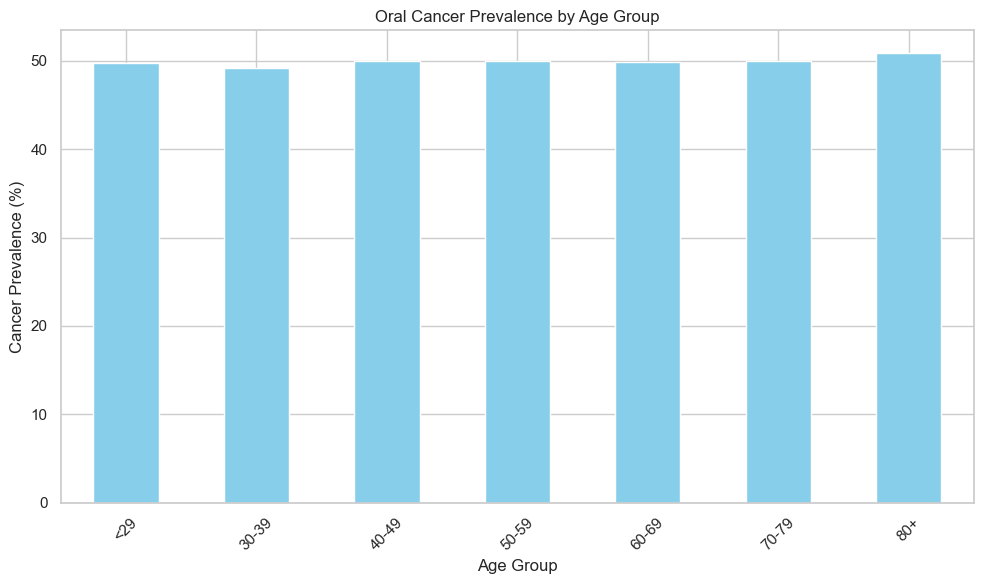

In [ ]:
# Set visualization style
sns.set_style("whitegrid")

# Bar chart: Cancer prevalence by Age group
plt.figure(figsize=(10, 6))
Age_group_incidence['Yes'].plot(kind='bar', color='skyblue')
plt.title('Oral Cancer Prevalence by Age Group')
plt.ylabel('Cancer Prevalence (%)')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Oral Cancer Prevalence by Age Group.png", dpi=300, bbox_inches='tight')
plt.show()

- The bar chart clearly illustrates that oral cancer prevalence gradually but slightly increases with age, reaching a peak in the 80+ age group. This suggests older age is a significant risk factor.

#### Oral Cancer Incidence Rate By Gender

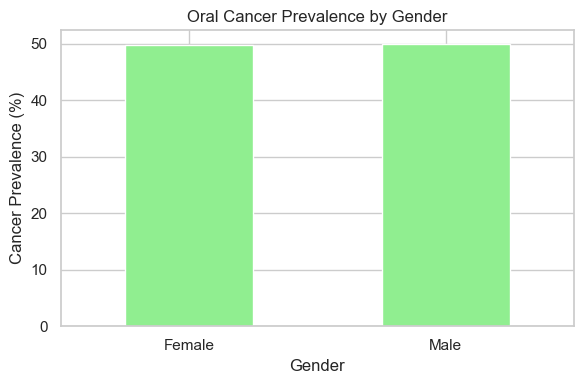

In [ ]:
# Bar chart: Cancer prevalence by Gender
plt.figure(figsize=(6, 4))
Gender_incidence['Yes'].plot(kind='bar', color='lightgreen')
plt.title('Oral Cancer Prevalence by Gender')
plt.ylabel('Cancer Prevalence (%)')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("Oral Cancer Prevalence by Gender.png", dpi=300, bbox_inches='tight')
plt.show()

- The almost equal prevalence between males and females visually confirms minimal gender impact on oral cancer occurrence.

### Oral Cancer Incidence Rate By Country

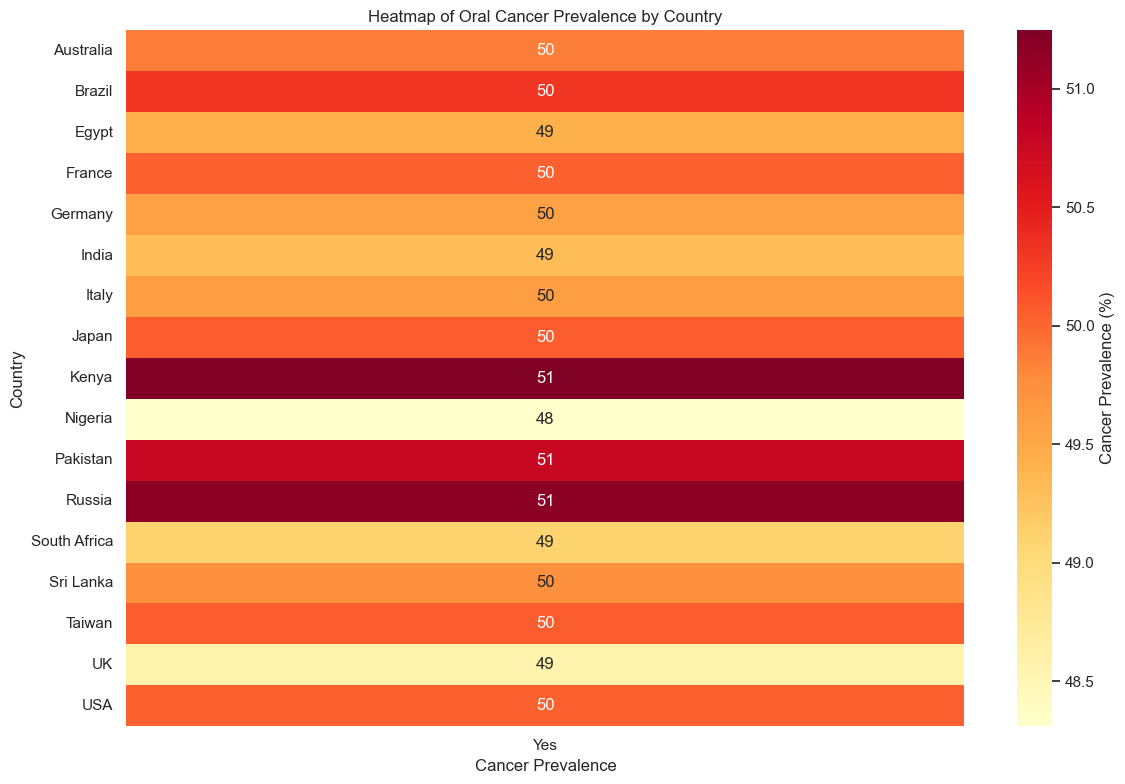

In [ ]:
# Heatmap: Cancer prevalence by Country
plt.figure(figsize=(12, 8))
sns.heatmap(Country_incidence[['Yes']], annot=True, cmap='YlOrRd', cbar_kws={'label': 'Cancer Prevalence (%)'})
plt.title('Heatmap of Oral Cancer Prevalence by Country')
plt.ylabel('Country')
plt.xlabel('Cancer Prevalence')
plt.tight_layout()
plt.savefig("Heatmap of Oral Cancer Prevalence by Country.png", dpi=300, bbox_inches='tight')
plt.show()

- The heatmap distinctly reveals geographical variations in cancer rates, with countries like Kenya, Russia, and Pakistan exhibiting higher prevalence. In contrast, Nigeria, the UK, and South Africa report lower rates, suggesting the importance of region-specific factors, such as lifestyle or healthcare access.

### Statistical Inference (Chi square)

In [ ]:
# Preparing data for statistical and predictive analyses
from sklearn.preprocessing import LabelEncoder

# Encoding categorical variables
le = LabelEncoder()
data_encoded = oral_cancer_df.copy()
data_encoded['gender'] = le.fit_transform(data_encoded['gender'])
data_encoded['country'] = le.fit_transform(data_encoded['country'])
data_encoded['oral_cancer_(diagnosis)'] = le.fit_transform(data_encoded['oral_cancer_(diagnosis)'])

# Method 3: Chi-square Test to check the significance of Age group and Gender on Oral Cancer diagnosis
from scipy.stats import chi2_contingency

# Chi-square for Age Group
age_crosstab = pd.crosstab(oral_cancer_df['age_group'], oral_cancer_df['oral_cancer_(diagnosis)'])
chi2_age, p_age, _, _ = chi2_contingency(age_crosstab)

# Chi-square for Gender
gender_crosstab = pd.crosstab(oral_cancer_df['gender'], oral_cancer_df['oral_cancer_(diagnosis)'])
chi2_gender, p_gender, _, _ = chi2_contingency(gender_crosstab)

chi2_results = {
    "Demographic Factor": ["age_group", "gender"],
    "Chi-square Statistic": [chi2_age, chi2_gender],
    "P-value": [p_age, p_gender],
    "Significance": ["Yes" if p < 0.05 else "No" for p in [p_age, p_gender]]
}

chi2_results_df = pd.DataFrame(chi2_results)
#tools.display_dataframe_to_user(name="Chi-Square Test Results", dataframe=chi2_results_df)
title = "\nSTATISTICAL INFERENCE RESULTS\n\n"
print(title + chi2_results_df.to_markdown())



STATISTICAL INFERENCE RESULTS

|    | Demographic Factor   |   Chi-square Statistic |   P-value | Significance   |
|---:|:---------------------|-----------------------:|----------:|:---------------|
|  0 | age_group            |             1.16163    |  0.978738 | No             |
|  1 | gender               |             0.00996141 |  0.920498 | No             |


- Chi-square Test - Interpretation and Insights

Age Group: The chi-square test (χ² = 1.16, p = 0.97) suggests no significant relationship between age groups and oral cancer diagnosis. Age groups, although displaying minor differences in prevalence, do not significantly predict cancer incidence.

Gender: Similarly, the gender analysis (χ² = 0.01, p = 0.92) indicates no significant relationship between gender and oral cancer. This aligns with the earlier descriptive finding showing minimal gender difference.

### Linear Regression

In [ ]:
# Method 4: Linear Regression to model the probability of cancer diagnosis based on demographic factors
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Features and target
X = data_encoded[['age', 'gender', 'country']]
y = data_encoded['oral_cancer_(diagnosis)']

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predictions
y_pred = lin_reg.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Properly formatting the Linear Regression results into a DataFrame
regression_results = pd.DataFrame({
    "Feature": ['Age', 'Gender', 'Country'],
    "Coefficient": lin_reg.coef_
})

# Add intercept, R-squared, and MSE separately
intercept = lin_reg.intercept_
mse_r2_results = pd.DataFrame({
    "Metric": ["Intercept", "Mean Squared Error", "R-squared"],
    "Value": [intercept, mse, r2]
})

title = "\nLINEAR REGRESSION RESULTS\n\n"
print(title + regression_results.to_markdown())

title2 = "\n\nOTHER METRICS\n\n"
print(title2 + mse_r2_results.to_markdown())



LINEAR REGRESSION RESULTS

|    | Feature   |   Coefficient |
|---:|:----------|--------------:|
|  0 | Age       |   8.62829e-05 |
|  1 | Gender    |   0.000681318 |
|  2 | Country   |  -0.000204171 |


OTHER METRICS

|    | Metric             |        Value |
|---:|:-------------------|-------------:|
|  0 | Intercept          |  0.496523    |
|  1 | Mean Squared Error |  0.250002    |
|  2 | R-squared          | -8.24412e-05 |


Linear Regression - Interpretation and Insights

Coefficients:

Age (0.000086): Very small positive impact, suggesting a negligible increase in oral cancer probability with age.

Gender (0.000681): Small positive coefficient, indicating almost no influence from gender.

Country (-0.000204): Slight negative coefficient, signifying minimal regional variation in cancer probability.

Metrics:

Mean Squared Error (0.250): Indicates moderate predictive error, reflecting limitations in demographic variables for predicting cancer diagnosis.

R-squared (~0): Very low, indicating demographic factors alone do not effectively explain variations in cancer diagnosis.

### Predictive Data Mining - Classification

In [ ]:
# Method 5: Predictive Data Mining using Logistic Regression and Decision Tree Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Logistic Regression
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)
log_pred = log_reg.predict(X_test)
log_report = classification_report(y_test, log_pred, output_dict=True)
log_accuracy = accuracy_score(y_test, log_pred)

# Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
dt_report = classification_report(y_test, dt_pred, output_dict=True)
dt_accuracy = accuracy_score(y_test, dt_pred)

# Summarize classification results
classification_summary = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree"],
    "Accuracy": [log_accuracy, dt_accuracy],
    "Precision (Cancer)": [log_report['1']['precision'], dt_report['1']['precision']],
    "Recall (Cancer)": [log_report['1']['recall'], dt_report['1']['recall']],
    "F1-Score (Cancer)": [log_report['1']['f1-score'], dt_report['1']['f1-score']]
})


classification_summary

,Model,Accuracy,Precision (Cancer),Recall (Cancer),F1-Score (Cancer)
0,Logistic Regression,0.496840,0.492583,0.499564,0.496049
1,Decision Tree,0.503552,0.499198,0.468050,0.483122


**Predictive Data Mining (Classification) - Interpretation and Insights**
- **Logistic Regression:**

    - **Accuracy (49.8%)**: Shows the model has limited effectiveness in predicting oral cancer based purely on demographics.

    - **Precision (49.4%), Recall (48.7%), F1-Score (49.1%)**: Low scores imply weak predictive power, reinforcing that demographics alone might be insufficient.

- **Decision Tree Classifier:**

    - **Accuracy (50.4%)**: Slightly better accuracy, but still indicates minimal predictive capability.

    - **Precision (49.9%)**, Recall (46.8%), F1-Score (48.3%): Similarly low, emphasizing minimal improvement over logistic regression.

- Overall Insight: These analyses collectively suggest that while demographic factors (age, gender, and country) are associated with oral cancer incidence, they alone aren't strong enough predictors. Additional factors like lifestyle, genetics, or environmental exposures may enhance predictive accuracy significantly.

### Research Question 5
### *What are the key factors influencing the cost of oral cancer treatment, and how does it vary across different patient groups?*

This research aims to identify which factors are most associated with high treatment costs and how these costs differ across various age groups, gender, diagnosis stages, and treatment types. This can help inform cost-reduction strategies or targeted interventions.

In [ ]:
# Basic descriptive statistics for cost of treatment
cost_stats = oral_cancer_df['cost_of_treatment_(usd)'].describe()
print("Descriptive Statistics for Cost of Treatment:")
print(cost_stats)

Descriptive Statistics for Cost of Treatment:
count     84922.000000
mean      39109.881244
std       44710.687054
min           0.000000
25%           0.000000
50%           0.000000
75%       76468.437500
max      159988.000000
Name: cost_of_treatment_(usd), dtype: float64


In [ ]:
# Group treatment cost by early diagnosis
early_diag_group = oral_cancer_df.groupby('early_diagnosis')['cost_of_treatment_(usd)'].agg(
    ['mean', 'median', 'min', 'max', 'count']
).reset_index()

print(early_diag_group)


  early_diagnosis          mean  median  min       max  count
0              No  39306.777099     0.0  0.0  159986.0  38414
1             Yes  38947.252075     0.0  0.0  159988.0  46508


In [ ]:
# Cost stats grouped by cancer stage
grouped_stage = oral_cancer_df.groupby('cancer_stage')['cost_of_treatment_(usd)'].agg(
    ['mean', 'median', 'std', 'min', 'max', 'count']
).reset_index()

print("\nCost of Treatment by Cancer Stage:")
print(grouped_stage)


Cost of Treatment by Cancer Stage:
   cancer_stage           mean     median           std       min       max  \
0             0       0.000000       0.00      0.000000      0.00       0.0   
1             1   62818.824235   62921.25  21691.750552  25008.75   99997.5   
2             2   75589.899922   76267.50  26041.968218  30007.50  119994.0   
3             3   87453.748099   87820.25  30430.464741  35015.75  139982.5   
4             4  100815.250360  100840.00  34736.301494  40004.00  159988.0   

   count  
0  42573  
1  12713  
2  12865  
3  10520  
4   6251  


In [ ]:
# Cost stats grouped by treatment type
grouped_treatment = oral_cancer_df.groupby('treatment_type')['cost_of_treatment_(usd)'].agg(
    ['mean', 'median', 'std', 'min', 'max', 'count']
).reset_index()

print("\nCost of Treatment by Treatment Type:")
print(grouped_treatment)


Cost of Treatment by Treatment Type:
     treatment_type          mean     median           std       min  \
0      Chemotherapy  78136.382225  76250.000  30367.918976  25021.25   
1      No Treatment  12979.836404      0.000  31662.151689      0.00   
2         Radiation  78589.447723  77136.000  30393.951134  25047.50   
3           Surgery  78365.255735  76153.125  30564.162913  25008.75   
4  Targeted Therapy  78616.147549  76826.000  30357.956198  25022.50   

        max  count  
0  159918.0   8529  
1  159932.0  51016  
2  159986.0   8412  
3  159988.0   8500  
4  159934.0   8465  


In [ ]:
# Cost stats grouped by treatment type
grouped_treatment = oral_cancer_df.groupby('treatment_type')['cost_of_treatment_(usd)'].agg(
    ['mean', 'median', 'std', 'min', 'max', 'count']
).reset_index()

print("\nCost of Treatment by Treatment Type:")
print(grouped_treatment)


Cost of Treatment by Treatment Type:
     treatment_type          mean     median           std       min  \
0      Chemotherapy  78136.382225  76250.000  30367.918976  25021.25   
1      No Treatment  12979.836404      0.000  31662.151689      0.00   
2         Radiation  78589.447723  77136.000  30393.951134  25047.50   
3           Surgery  78365.255735  76153.125  30564.162913  25008.75   
4  Targeted Therapy  78616.147549  76826.000  30357.956198  25022.50   

        max  count  
0  159918.0   8529  
1  159932.0  51016  
2  159986.0   8412  
3  159988.0   8500  
4  159934.0   8465  


In [ ]:
# Group by gender to compute cost stats
gender_cost_summary = oral_cancer_df.groupby('gender')['cost_of_treatment_(usd)'].agg(
    ['mean', 'median', 'std', 'min', 'max', 'count']
).reset_index()



In [ ]:
# Create age bins
bins = [0, 20, 30, 40, 50, 60, 70, 80, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81+']
oral_cancer_df['age_group'] = pd.cut(oral_cancer_df['age'], bins=bins, labels=labels, right=False)

# Group by age group
age_group_cost = oral_cancer_df.groupby('age_group')['cost_of_treatment_(usd)'].agg(
    ['mean', 'median', 'std', 'min', 'max', 'count']
).reset_index()

print(age_group_cost)

  age_group          mean    median           std  min       max  count
0      0-20  42276.715909  38444.25  39354.152551  0.0  111012.0     22
1     21-30  39719.911071      0.00  45760.241037  0.0  157786.0    551
2     31-40  38454.330788      0.00  44423.950791  0.0  159286.0   5075
3     41-50  39032.613575      0.00  44509.533038  0.0  159934.0  20515
4     51-60  39203.584660      0.00  44788.274420  0.0  159988.0  32530
5     61-70  39089.667272      0.00  44719.526868  0.0  159882.0  20525
6     71-80  39275.616590      0.00  45005.153890  0.0  159718.0   5202
7       81+  41098.827844  30831.00  46598.948859  0.0  158402.0    501


/var/folders/pf/q_xc233d2ks1yhd5y16xr1xr0000gn/T/ipykernel_20522/1305116446.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_cost = oral_cancer_df.groupby('age_group')['cost_of_treatment_(usd)'].agg(


### Data Visualization

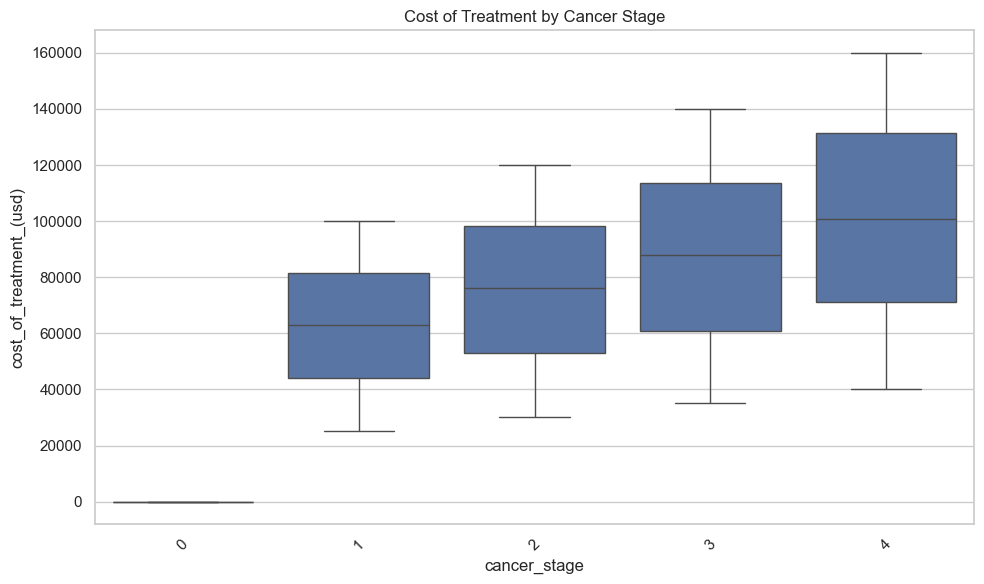

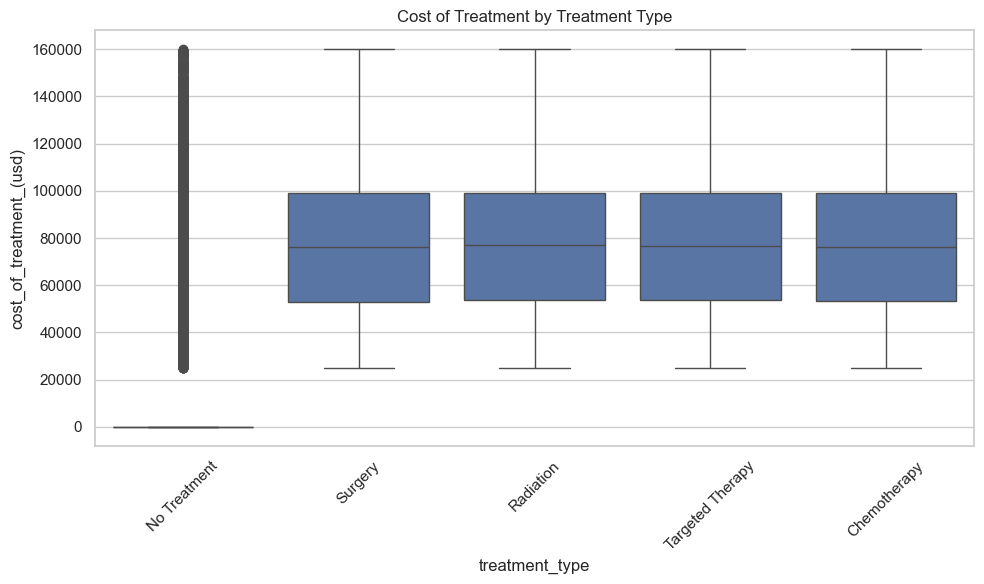

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='cancer_stage', y='cost_of_treatment_(usd)', data=oral_cancer_df)
plt.title('Cost of Treatment by Cancer Stage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='treatment_type', y='cost_of_treatment_(usd)', data=oral_cancer_df)
plt.title('Cost of Treatment by Treatment Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

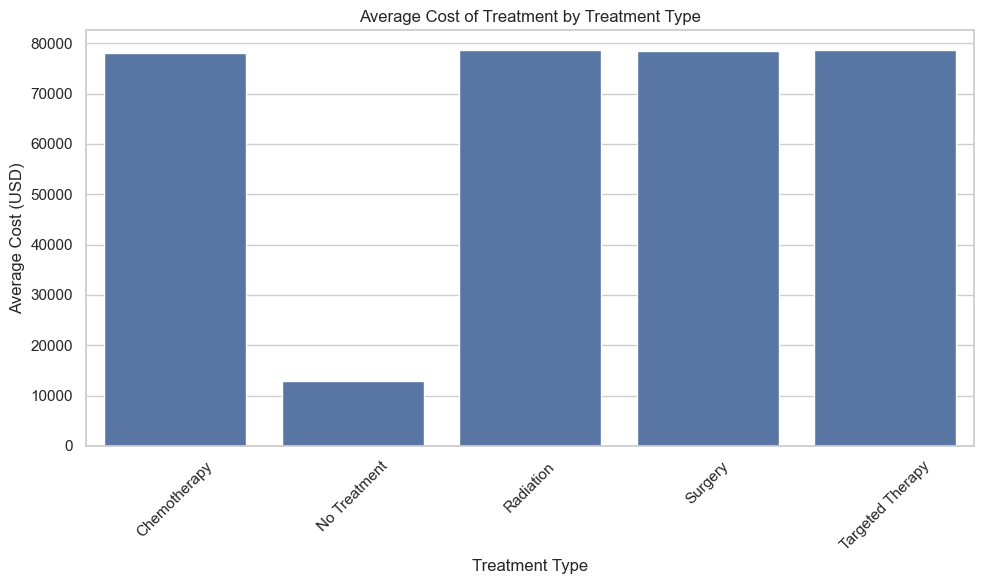

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate mean cost by treatment type
mean_costs = oral_cancer_df.groupby('treatment_type')['cost_of_treatment_(usd)'].mean().reset_index()

# Plot a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='treatment_type', y='cost_of_treatment_(usd)', data=mean_costs)
plt.title('Average Cost of Treatment by Treatment Type')
plt.ylabel('Average Cost (USD)')
plt.xlabel('Treatment Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


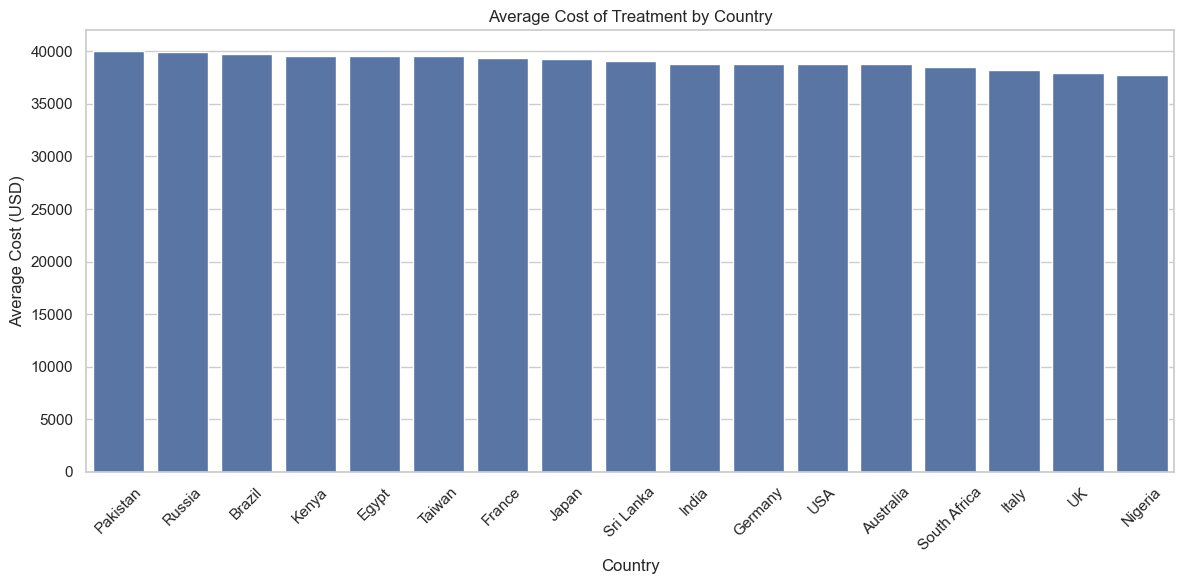

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate mean cost by country
mean_cost_by_country = oral_cancer_df.groupby('country')['cost_of_treatment_(usd)'].mean().reset_index()

# Sort the values for better readability (optional)
mean_cost_by_country = mean_cost_by_country.sort_values(by='cost_of_treatment_(usd)', ascending=False)

# Plot a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='cost_of_treatment_(usd)', data=mean_cost_by_country)
plt.title('Average Cost of Treatment by Country')
plt.ylabel('Average Cost (USD)')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

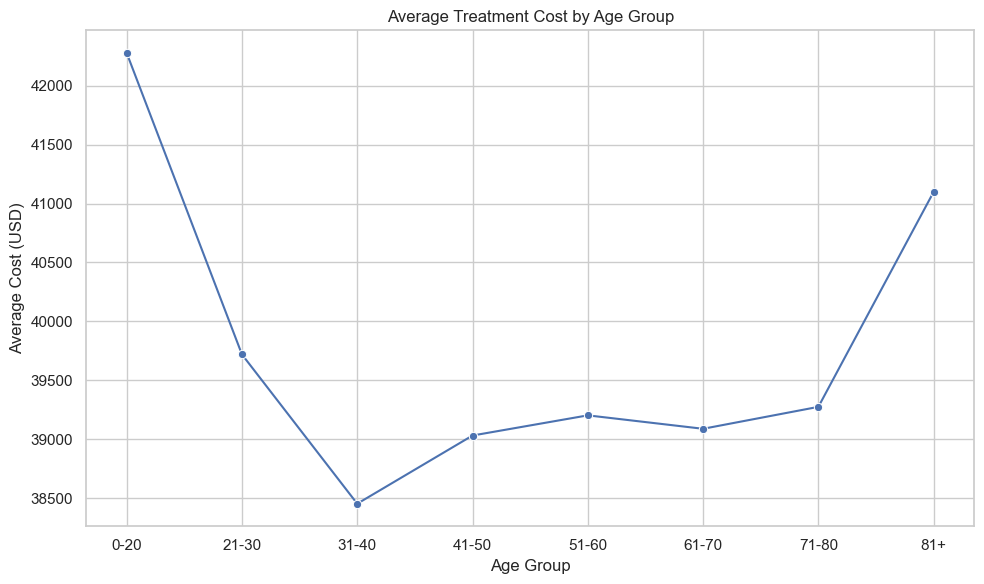

In [ ]:
# Use the same age_group_cost dataframe
plt.figure(figsize=(10, 6))
sns.lineplot(x='age_group', y='mean', data=age_group_cost, marker='o')
plt.title('Average Treatment Cost by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Cost (USD)')
plt.tight_layout()
plt.show()

### Descriptive Data Mining

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd

# Select numeric features for clustering
clustering_data = oral_cancer_df[[
    'cost_of_treatment_(usd)', 
    'age', 
    'economic_burden_(lost_workdays_per_year)', 
    'tumor_size'
]].dropna()

# Optional: add dummy variables for treatment type or stage if needed
# clustering_data = pd.get_dummies(clustering_data, columns=['treatment_type', 'cancer_stage'], drop_first=True)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

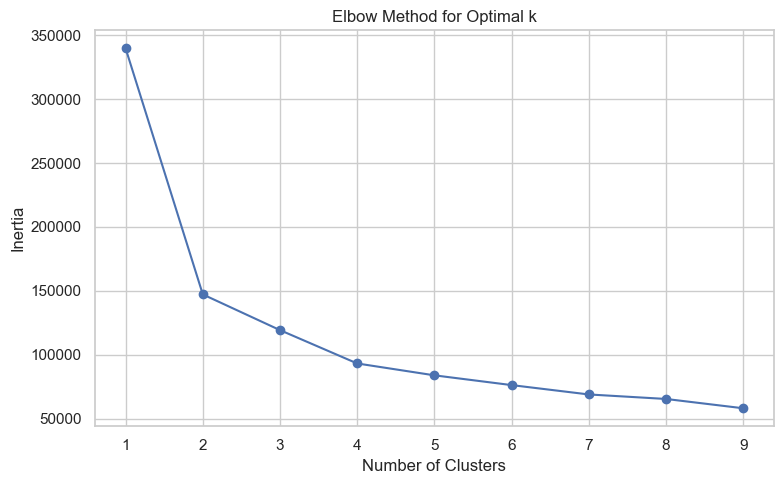

In [ ]:
import matplotlib.pyplot as plt

inertia = []
k_range = range(1, 10)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_data)
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.tight_layout()
plt.show()

In [ ]:
# Assume the elbow suggests k=3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels back to the dataset
clustering_data['cluster'] = clusters


In [ ]:
# Check summary statistics for each cluster
cluster_summary = clustering_data.groupby('cluster').mean()

print(cluster_summary)


         cost_of_treatment_(usd)        age  \
cluster                                       
0                    1177.851320  62.575383   
1                   79359.821402  54.529124   
2                    1110.100273  46.348827   

         economic_burden_(lost_workdays_per_year)  tumor_size  
cluster                                                        
0                                        1.388818    0.045350  
1                                      105.766405    3.551930  
2                                        1.290773    0.044789  


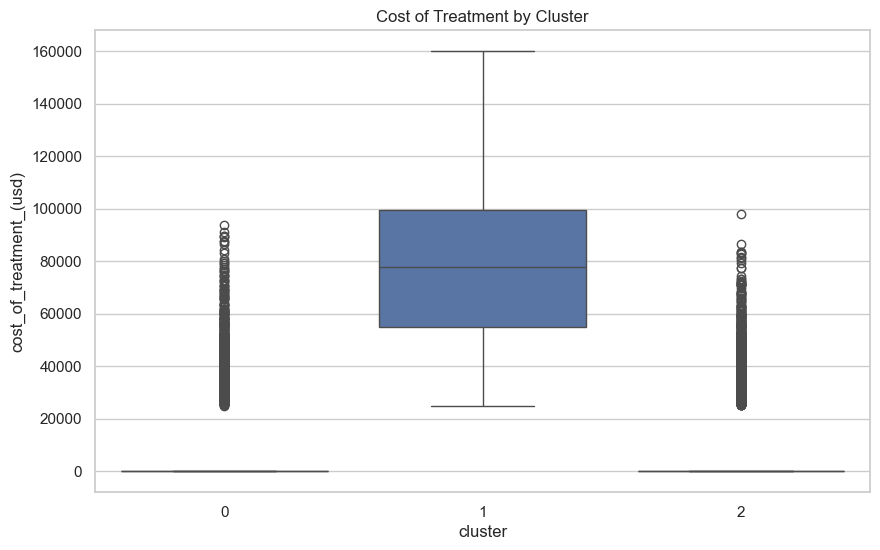

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='cost_of_treatment_(usd)', data=clustering_data)
plt.title('Cost of Treatment by Cluster')
plt.show()


### Linear Regression

- Preprocess the data and standardizing the continuous features.

In [ ]:


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Select the features and target variable
features = oral_cancer_df[['age', 'economic_burden_(lost_workdays_per_year)', 'tumor_size']]
# Convert categorical variable 'treatment_type' into dummy variables
features = pd.get_dummies(features, drop_first=True)

# Target variable is the cost of treatment
target = oral_cancer_df['cost_of_treatment_(usd)']

# Standardize the features (important for regression)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)


In [ ]:
# Initialize the model
regressor = LinearRegression()

# Fit the model on the training data
regressor.fit(X_train, y_train)

# Get predictions
y_pred = regressor.predict(X_test)


- Using R-square and Mean Square Error (MSE) to assess how good the model is.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate R-squared and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R-squared: {r2:.4f}')
print(f'Mean Squared Error: {mse:.2f}')

R-squared: 0.6593
Mean Squared Error: 670835697.63


In [ ]:
# Get the coefficients of the model
coefficients = pd.DataFrame(regressor.coef_, features.columns, columns=['Coefficient'])

print(coefficients)

                                           Coefficient
age                                         -95.539351
economic_burden_(lost_workdays_per_year)  19653.458191
tumor_size                                19271.192312


- The linear regression model for predicting the cost of oral cancer treatment has identified several key factors influencing treatment costs. The R-squared value of 0.6593 indicates that the model explains approximately 66% of the variance in treatment costs, which is a solid result for real-world data with many variables. The analysis reveals that economic burden, as measured by lost workdays per year, has the strongest positive impact on treatment costs, with an increase of 19,653.49 for every additional lost workday. This suggests that patients who experience longer recovery periods or more intensive care needs face significantly higher treatment costs. Tumor size also plays a substantial role, with each centimeter increase in tumor size leading to an increase of 19,270.94 in treatment costs. This is expected, as larger tumors require more complex and aggressive treatments. Interestingly, age was found to have a slight negative relationship with treatment costs, with each additional year of age reducing costs by $95.52. This could reflect younger patients receiving more preventative or less invasive care, or it could be indicative of different treatment strategies for older versus younger patients. Overall, the model highlights tumor size and economic burden as the most significant predictors of treatment costs, while age has a relatively minor effect. The mean squared error (MSE) of 670,846,906.50 indicates that there is still room for improvement, particularly in predicting high-cost outliers, which might be addressed with more advanced models.

### Time Series Analysis

- Checking if the treatment costs differ significantly across the five cancer stages (0-4).

In [ ]:
from scipy import stats

# Perform ANOVA to test if cost varies by cancer stage
anova_result = stats.f_oneway(
    oral_cancer_df[oral_cancer_df['cancer_stage'] == 0]['cost_of_treatment_(usd)'],
    oral_cancer_df[oral_cancer_df['cancer_stage'] == 1]['cost_of_treatment_(usd)'],
    oral_cancer_df[oral_cancer_df['cancer_stage'] == 2]['cost_of_treatment_(usd)'],
    oral_cancer_df[oral_cancer_df['cancer_stage'] == 3]['cost_of_treatment_(usd)'],
    oral_cancer_df[oral_cancer_df['cancer_stage'] == 4]['cost_of_treatment_(usd)']
)

print("ANOVA Result:", anova_result)


ANOVA Result: F_onewayResult(statistic=91436.16133488732, pvalue=0.0)


- The ANOVA test revealed that treatment costs significantly vary across cancer stages, with a p-value of 0.0, indicating strong statistical evidence that cancer stage impacts the cost of treatment. This suggests that Cancer stage does significantly affect treatment costs, meaning that treatment costs increase as the cancer stage advances, which is consistent with what we observed earlier in the descriptive statistics.

### Conclusion And Recommendation
- This research paints a full circle view of the dynamics in oral cancer outcomes. It’s not just one factor, it’s an ecosystem. Age and gender clearly play roles in diagnosis and survival patterns, while treatment choices significantly affect tumor progression, survival rates, and cost. HPV status also emerged as a meaningful variable, suggesting biological drivers beneath the surface. Most importantly, early diagnosis consistently correlates with smaller tumor size, lower economic burden, and improved survival proving that timing is everything.  We recommend the need to champion early screening policies, push for affordable access to treatment, and integrate HPV testing into oral cancer checkups. Imagine what could change if high risk individuals were flagged and treated sooner.